# **Data Preprocessing and Cleaning**

##**1.Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
#Confusion Matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
#Precision
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
my_data = pd.read_excel("BankingDataset.xlsx")

In [ ]:
df=my_data

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.shape

(32950, 16)

##**2. Checking for different datatypes in the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


It can be observed that the data has 10 categorical features and 5 numeric fearures. The output variable i.e. y is boolean in nature, here 'yes' means that the client has subscribed to the term deposit and vice-versa

##**3. Checking for missing values**

In [ ]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

It can be observed that our dataset has no null/missing values

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

##**4. Checking how many clients have subscribned to the term deposit**

In [ ]:
df.y.value_counts() 

no     29238
yes     3712
Name: y, dtype: int64

It can be observed that 3712 clients have subscribed to the term deposit

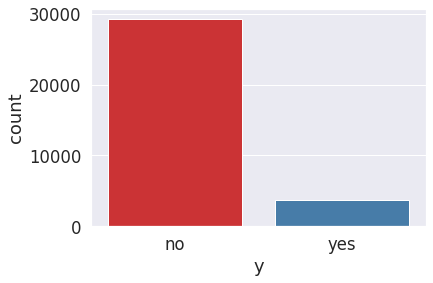

In [ ]:
sns.set(font_scale=1.5)
countplt=sns.countplot(x='y', data=df, palette ='Set1')
plt.show()

The data is very unbalanced. The count of 'no' is much higher than 'yes'

##**5. Checking for duplicate values**

In [ ]:
df.duplicated().sum()

8

It can be observed that our dataset has 8 duplicate values, we now drop them

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.y.value_counts() 

no     29230
yes     3712
Name: y, dtype: int64

##**6. Dealing with data points under the label 'unknown'**

In [ ]:
print("# Missing value 'job' variable: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing value 'marital' variable: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing value 'education' variable: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing value 'default' variable: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing value 'housing' variable: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing value 'loan' variable: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing value 'contact' variable: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing value 'month' variable: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing value 'day_of_week' variable: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing value 'poutcome' variable: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing value 'job' variable: 265
# Missing value 'marital' variable: 65
# Missing value 'education' variable: 1396
# Missing value 'default' variable: 6939
# Missing value 'housing' variable: 796
# Missing value 'loan' variable: 796
# Missing value 'contact' variable: 0
# Missing value 'month' variable: 0
# Missing value 'day_of_week' variable: 0
# Missing value 'poutcome' variable: 0


Dropping 'unknown' columns in marital

In [ ]:
df[df['marital'] == "unknown"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
252,34,admin.,unknown,university.degree,no,yes,no,cellular,jul,thu,243,1,999,0,nonexistent,no
289,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,164,1,999,0,nonexistent,yes
956,50,unemployed,unknown,basic.9y,no,yes,yes,cellular,nov,thu,139,1,999,0,nonexistent,no
978,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,157,4,999,1,failure,no
1112,49,unknown,unknown,unknown,unknown,yes,yes,cellular,jul,mon,49,9,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30306,45,unknown,unknown,unknown,no,yes,no,cellular,jul,wed,586,1,999,0,nonexistent,yes
30747,66,retired,unknown,basic.9y,no,yes,no,cellular,aug,wed,340,2,999,0,nonexistent,no
31362,66,retired,unknown,basic.9y,no,yes,no,cellular,aug,wed,810,3,999,2,failure,yes
32135,25,technician,unknown,university.degree,no,yes,yes,cellular,may,mon,150,1,999,0,nonexistent,no


In [ ]:
df.drop(df[df['marital'] == "unknown"].index, inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(32877, 16)

In [ ]:
df[df['default'] == "yes"].shape

(3, 16)

We retain the 'unknown' category in the attribute 'default' as they are high in number

In [ ]:
df.education.value_counts() 

university.degree      9706
high.school            7584
basic.9y               4819
professional.course    4187
basic.4y               3318
basic.6y               1860
unknown                1387
illiterate               16
Name: education, dtype: int64

In [ ]:
df.job.value_counts() 

admin.           8301
blue-collar      7428
technician       5388
services         3190
management       2343
retired          1361
entrepreneur     1157
self-employed    1095
housemaid         852
unemployed        795
student           710
unknown           257
Name: job, dtype: int64

##**7. Describing Numerical Variables**

In [ ]:
df.describe() 

,age,duration,campaign,pdays,previous
count,32877.000000,32877.000000,32877.000000,32877.000000,32877.000000
mean,40.012167,258.022812,2.559571,962.091097,0.174499
std,10.401993,258.903818,2.749534,187.856729,0.498870
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


##**Key Points**
1. The minimum age here is 17, indicating that the campaign mainly targets adults
2. 'duration' indicates last contact duration(in seconds), if the duration value is '0', the y(Output variable) will always be 'no'

# **Exploratory Data Analysis(EDA)**

**1. Checking for outliers**

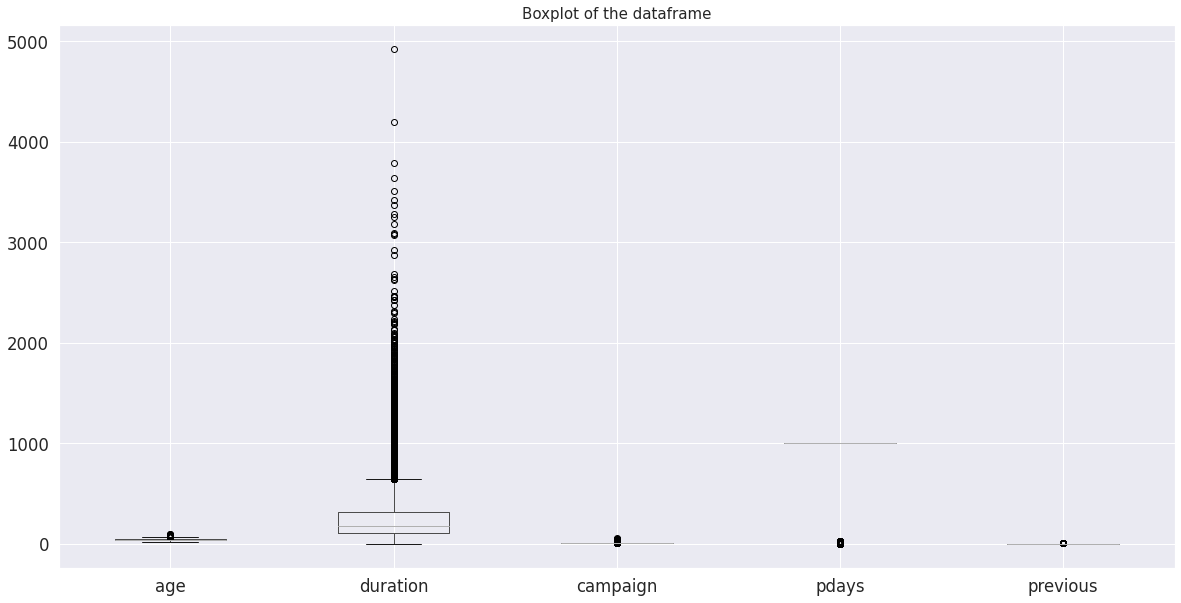

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

It can be ovserved that 'duration' has a high number of outliers. 'age' also has few outliers.

Now we individually plot these features to gain better understanding

Duration

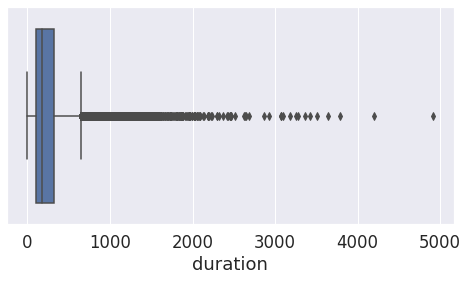

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

Age

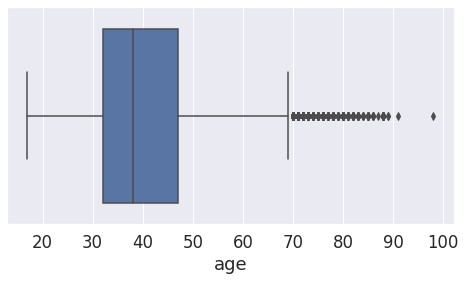

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.show()

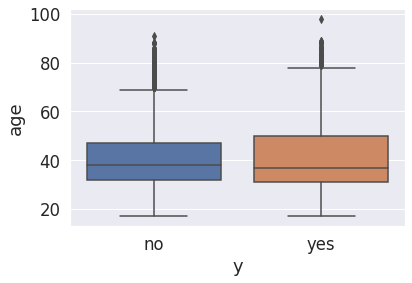

In [ ]:
sns.boxplot(x = 'y', y = 'age', data = df)

Although it can be observed that clients over the age of 45 are more likely to subscribe to the term deposit, there is hardly any difference

Campaign

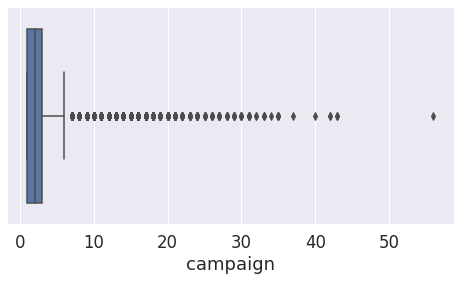

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['campaign'])
plt.show()

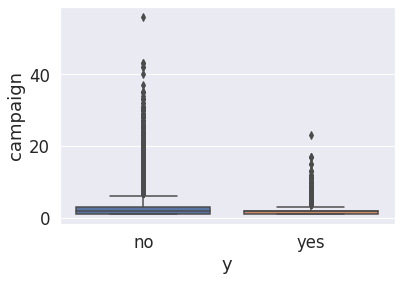

In [ ]:
sns.boxplot(x = 'y', y = 'campaign', data= df) 

Calculation of Inter Quartile Range and removal of outliers

In [ ]:
Q1_d = df['duration'].quantile(.25)
Q3_d = df['duration'].quantile(.75)
Q1_a = df['age'].quantile(.25)
Q3_a = df['age'].quantile(.75)
Q1_c = df['campaign'].quantile(.25)
Q3_c = df['campaign'].quantile(.75)

In [ ]:
IQR_d = Q3_d - Q1_d
IQR_a = Q3_a - Q1_a
IQR_c = Q3_c - Q1_c

In [ ]:
print(IQR_d)
print(IQR_a)
print(IQR_c)

216.0
15.0
2.0


In [ ]:
lower_d = Q1_d - 1.5 * IQR_d
upper_d = Q3_d + 1.5 * IQR_d
lower_a = Q1_a - 1.5 * IQR_a
upper_a = Q3_a + 1.5 * IQR_a
lower_c = Q1_c - 1.5 * IQR_d
upper_c = Q3_c + 1.5 * IQR_d

In [ ]:
print(lower_d,upper_d)
print(lower_a,upper_a)
print(lower_c,upper_c)

-221.0 643.0
9.5 69.5
-323.0 327.0


**We assume that**


'duration' above 643.0 are outliers

'age' above 69.5 is an outlier

'campaign' above 327.0 is an outlier

Now we drop these outliers

In [ ]:
df_out = df[df['duration'] >= lower_d] 
df_out= df[df['duration'] <= upper_d] 
df_out = df[df['age'] >= lower_a] 
df_out= df[df['age'] <= upper_a] 
df_out = df[df['campaign'] >= lower_c] 
df_out= df[df['campaign'] <= upper_c] 

In [ ]:
df_out.describe()

,age,duration,campaign,pdays,previous
count,32877.000000,32877.000000,32877.000000,32877.000000,32877.000000
mean,40.012167,258.022812,2.559571,962.091097,0.174499
std,10.401993,258.903818,2.749534,187.856729,0.498870
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


**2. Checking for correlation between numerical features**

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

               age  duration  campaign     pdays  previous
age       1.000000 -0.002484  0.002786 -0.032682  0.021126
duration -0.002484  1.000000 -0.075795 -0.046965  0.022112
campaign  0.002786 -0.075795  1.000000  0.053674 -0.079039
pdays    -0.032682 -0.046965  0.053674  1.000000 -0.589771
previous  0.021126  0.022112 -0.079039 -0.589771  1.000000


Plotting a heatmap

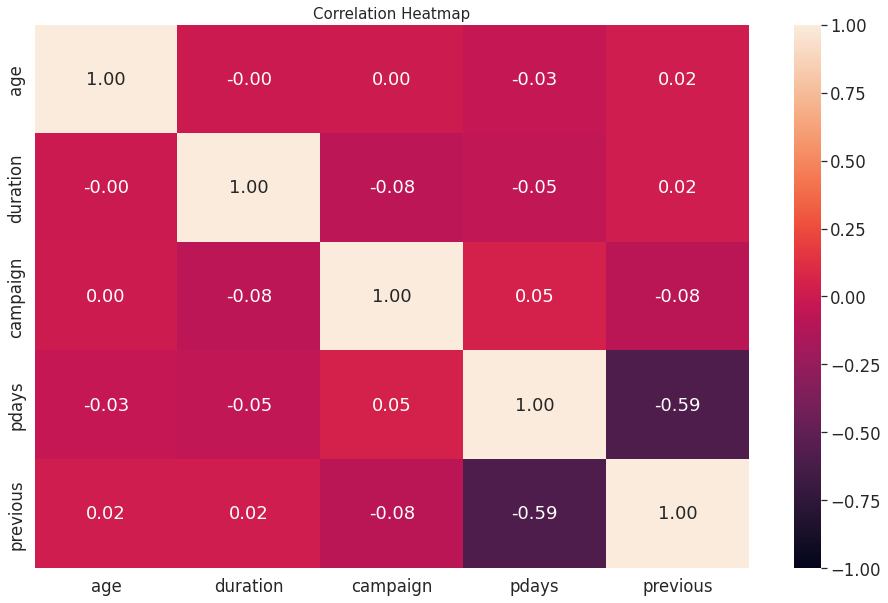

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

Previous and Pdays seems to be correlated, but overall no strong correlation was observed in the data

**3. Changing 'yes' to 1 and 'no' to 0 in output variable y**

In [ ]:
df['y'] = (df['y']=='yes').astype(int) 
df.y.value_counts() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    29176
1     3701
Name: y, dtype: int64

**4. Which age group has subscribed the most to the term deposit?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


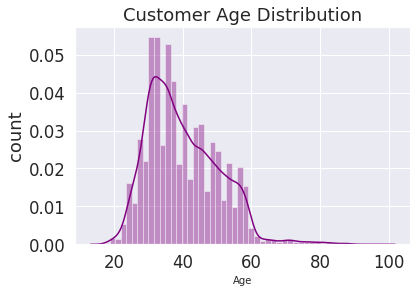

In [ ]:
sns.distplot(df['age'], color = 'purple')
plt.title('Customer Age Distribution', fontsize = 18)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('count')
plt.show()

Clients between the age of 25 to 39 hyave subscribed to the deposit the most

Text(0.5, 0, 'duration')

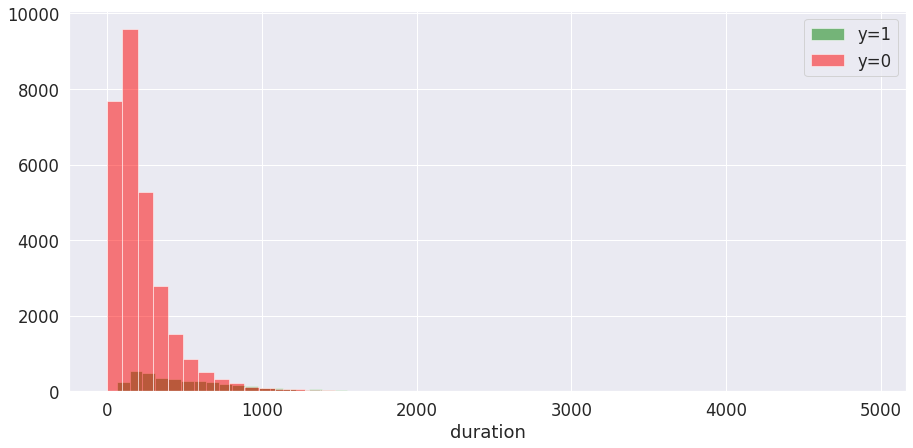

In [ ]:
plt.figure(figsize=(15,7))
df[df['y']==1]['duration'].hist(alpha = 0.5, color = 'green', bins= 50, label='y=1')
df[df['y']==0]['duration'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=0')
plt.legend()
plt.xlabel('duration')

Text(0.5, 0, 'age')

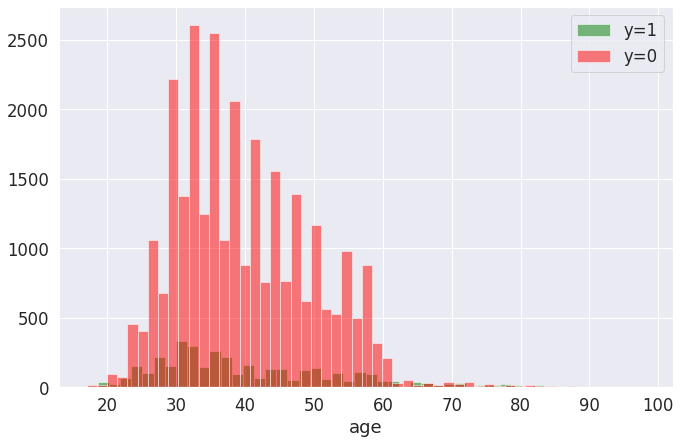

In [ ]:
plt.figure(figsize=(11,7))
df[df['y']==1]['age'].hist(alpha = 0.5, color = 'green', bins= 50, label='y=1')
df[df['y']==0]['age'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=0')
plt.legend()
plt.xlabel('age')

Text(0.5, 0, 'campaign')

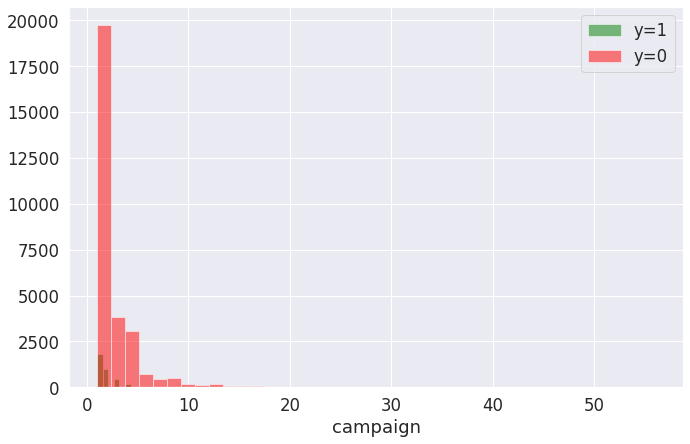

In [ ]:
plt.figure(figsize=(11,7))
df[df['y']==1]['campaign'].hist(alpha = 0.5, color = 'green', bins= 40, label='y=1')
df[df['y']==0]['campaign'].hist(alpha =0.5, color = 'red', bins= 40, label='y=0')
plt.legend()
plt.xlabel('campaign')

**5. Checking the trend between marital and y**

<Figure size 792x504 with 0 Axes>

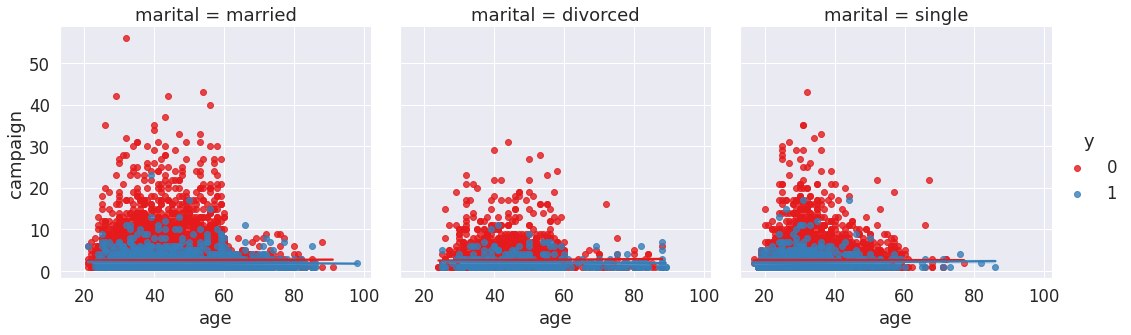

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='campaign',x='age',hue = 'y', data=df,col='marital',palette='Set1')

It can be observed that married clients have responded more to the campaigns and subscribed more as well

**6. Relationship between the output variable(y) and duration**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


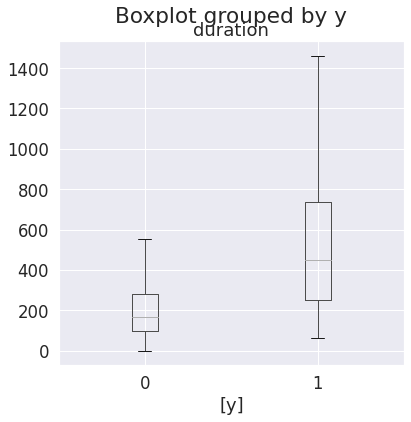

In [ ]:
df[['duration', 'y']].boxplot(by=['y'], sym ='', figsize = [6, 6])

**7. Analysis of categorical varibles**

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3


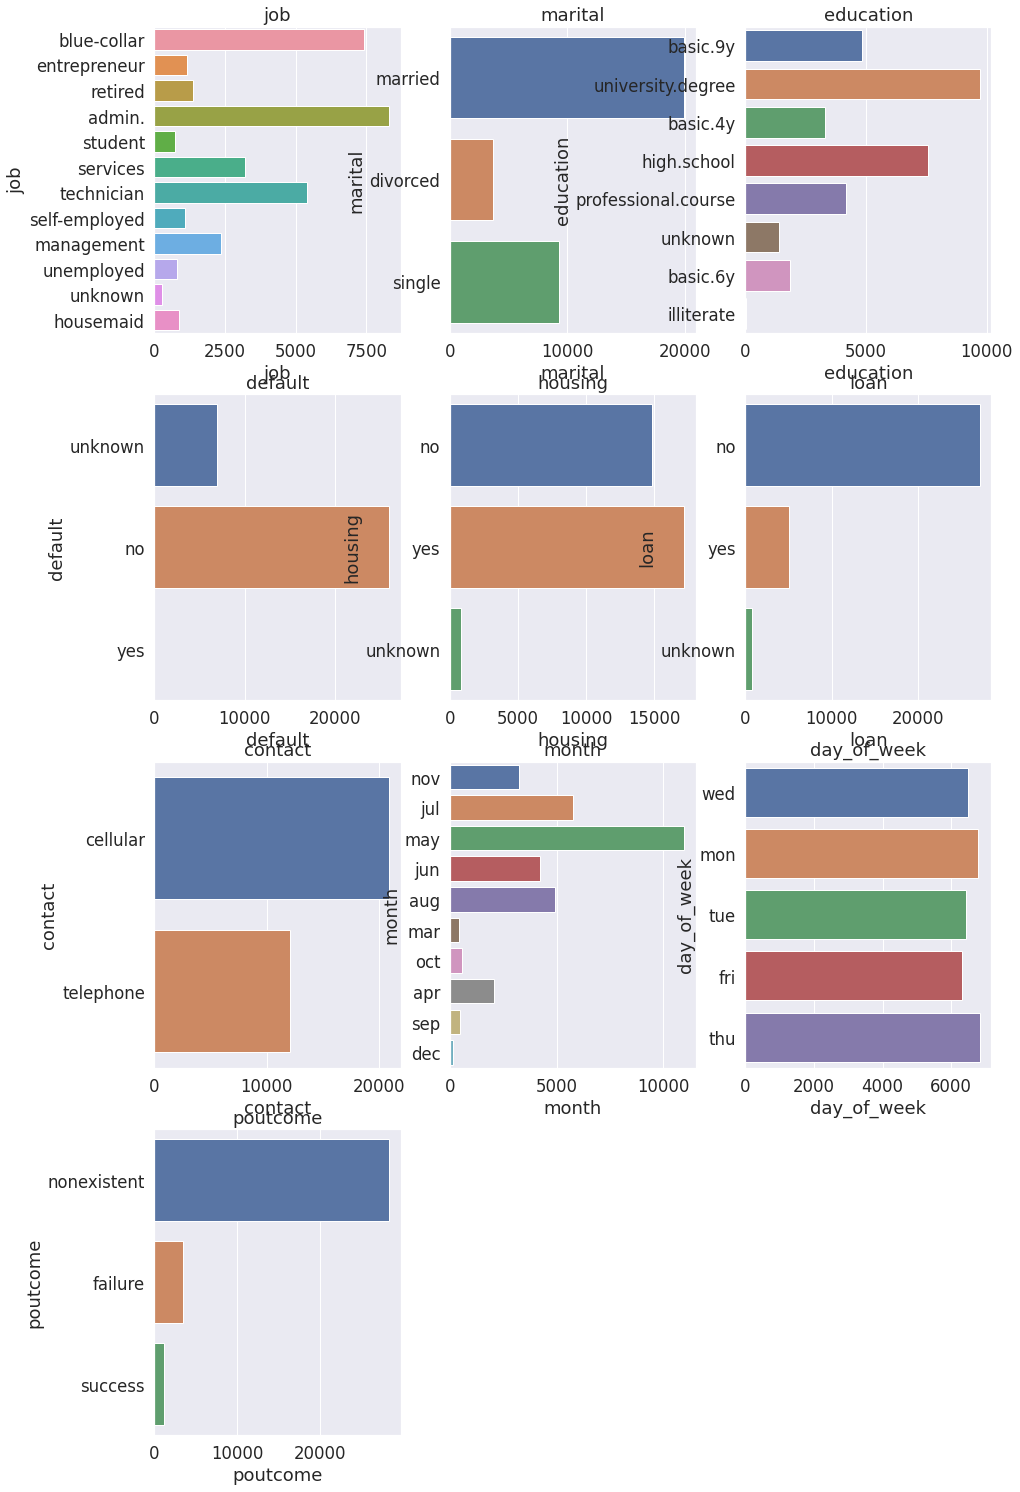

In [ ]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

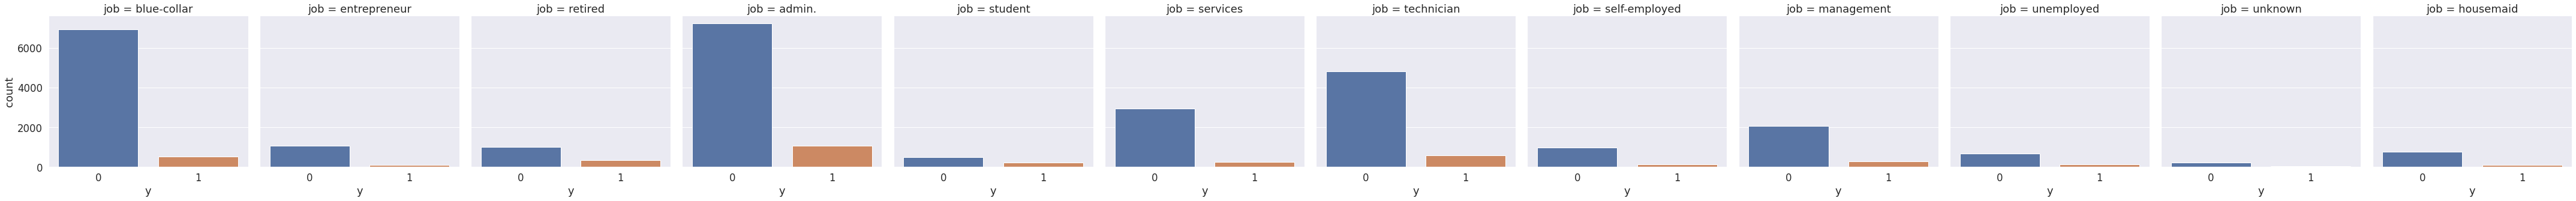

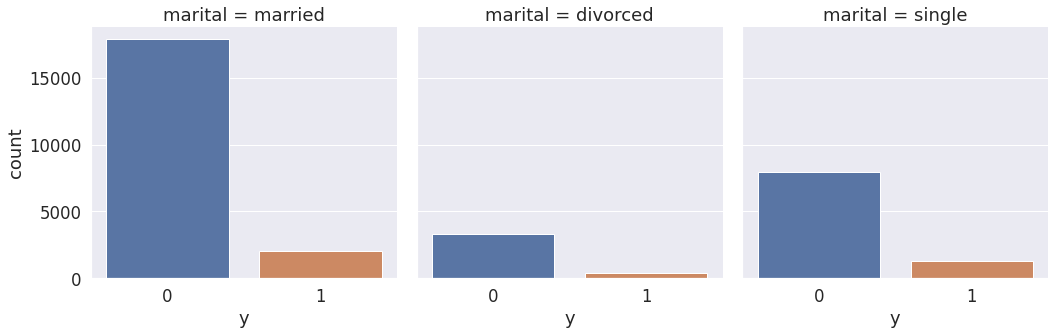

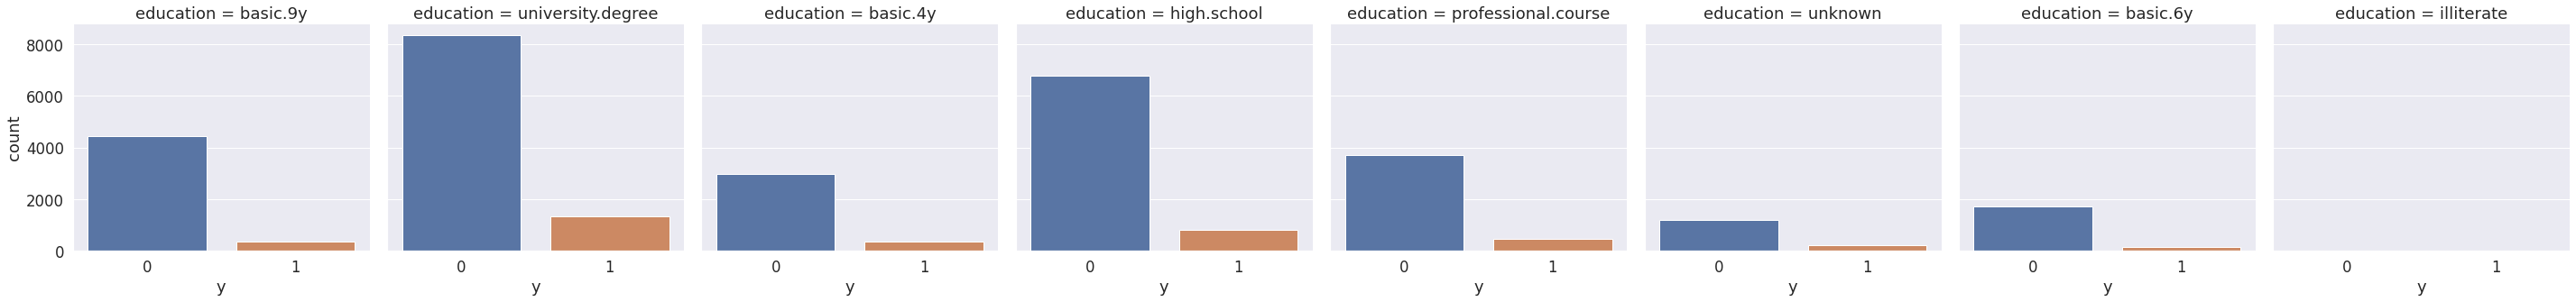

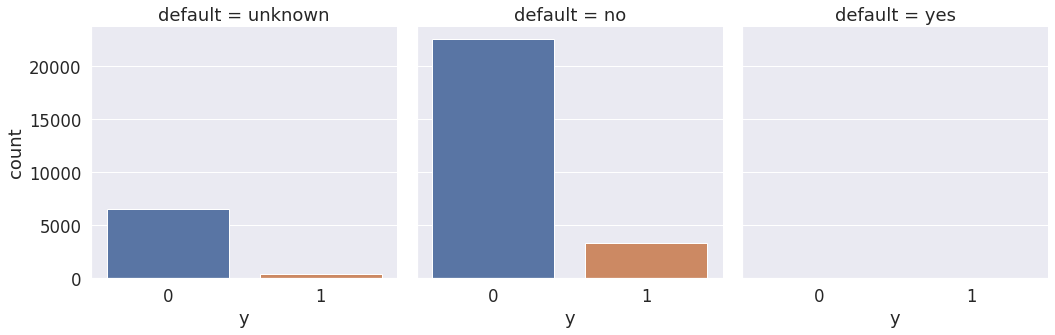

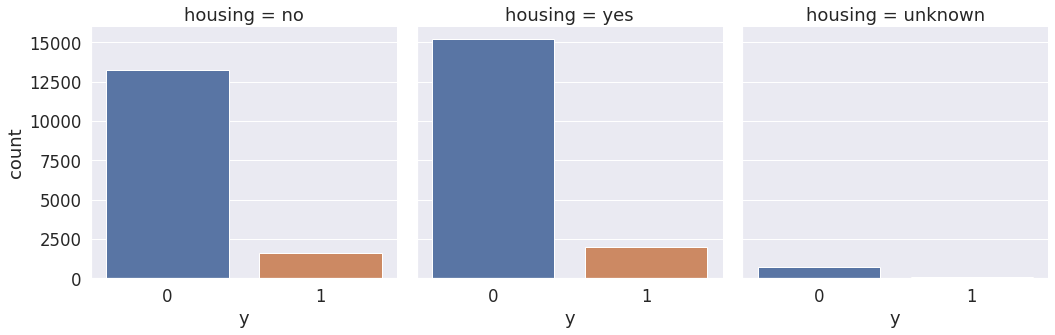

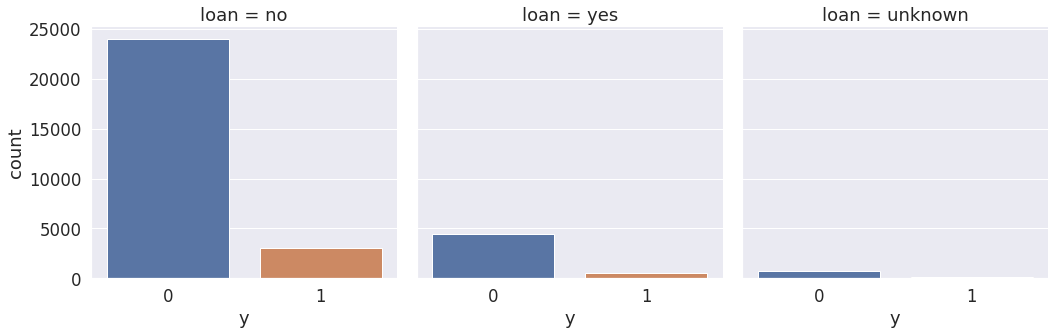

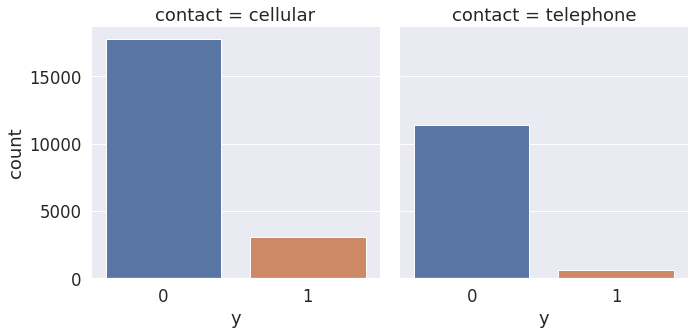

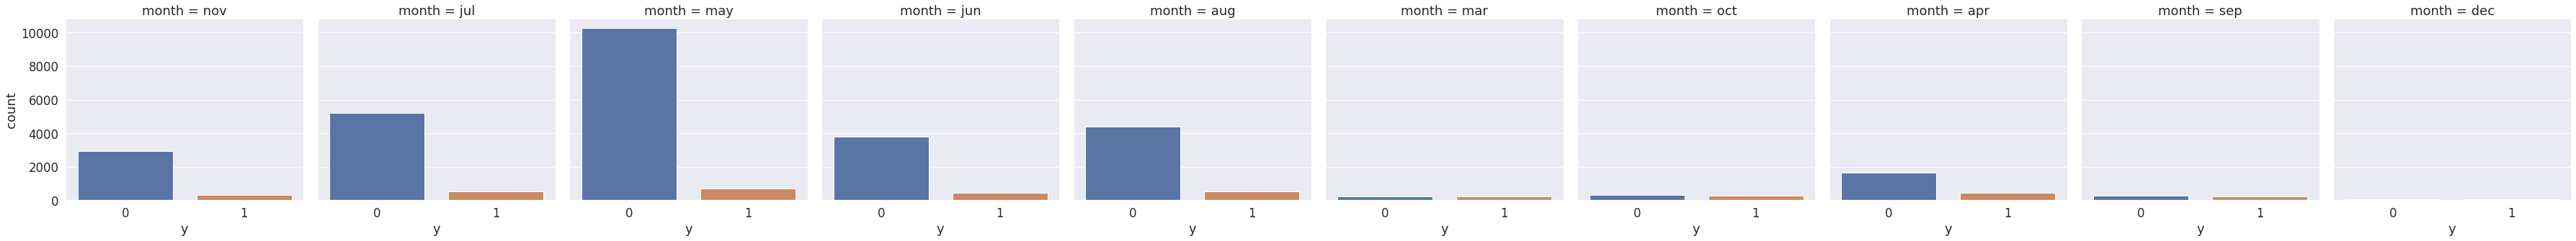

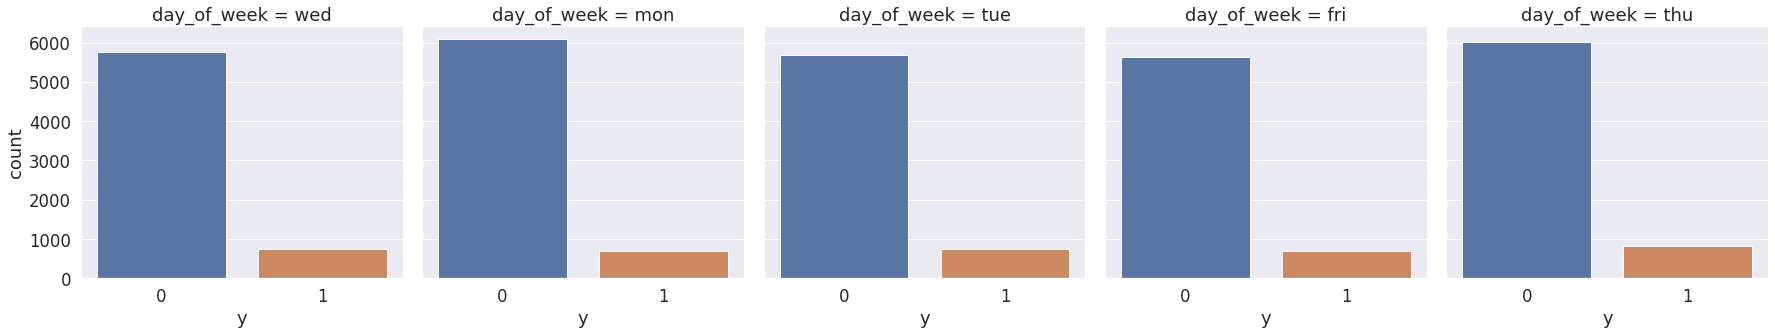

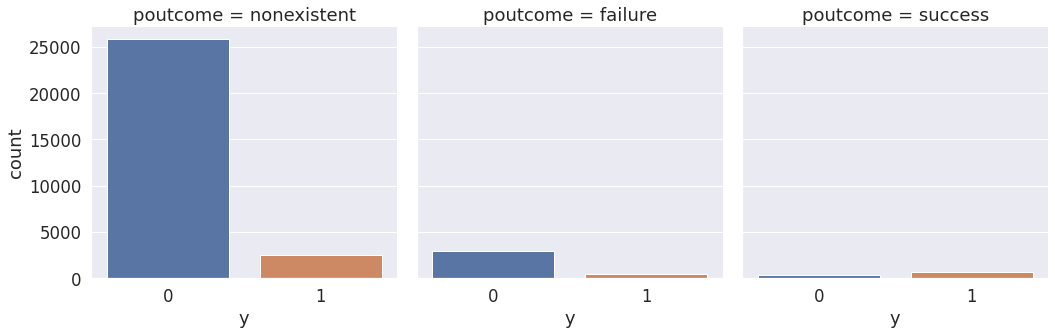

In [ ]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

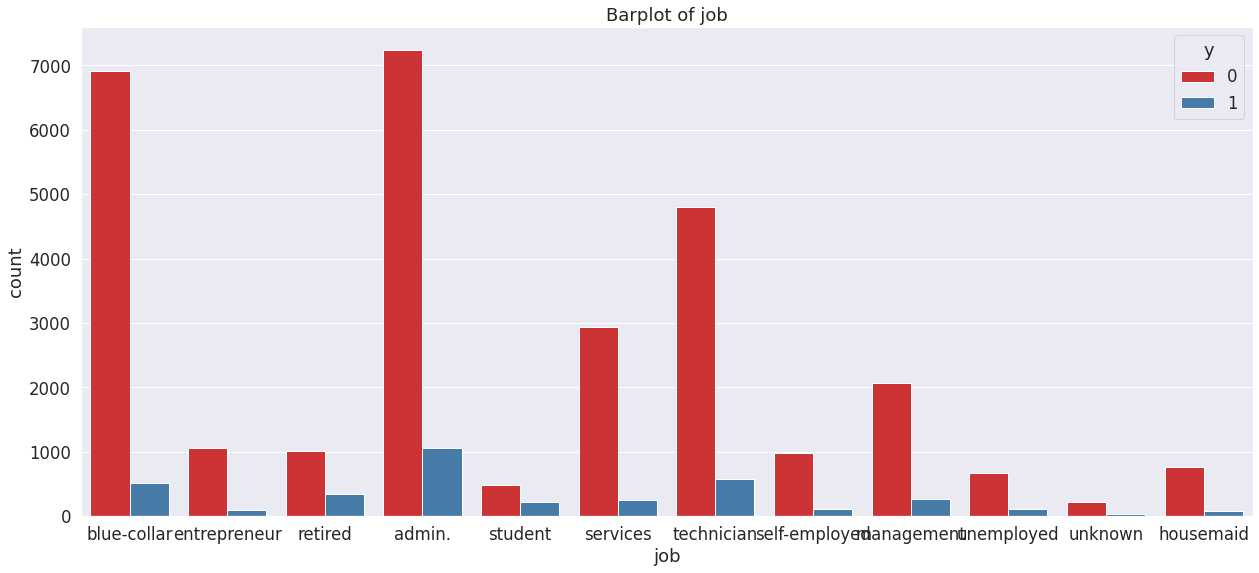

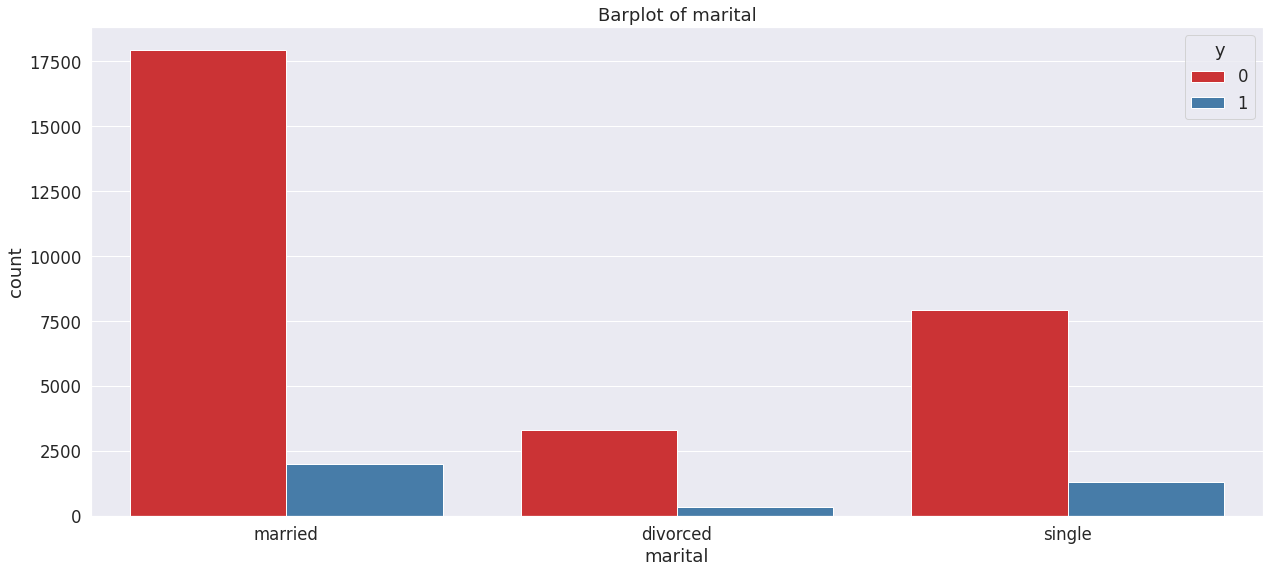

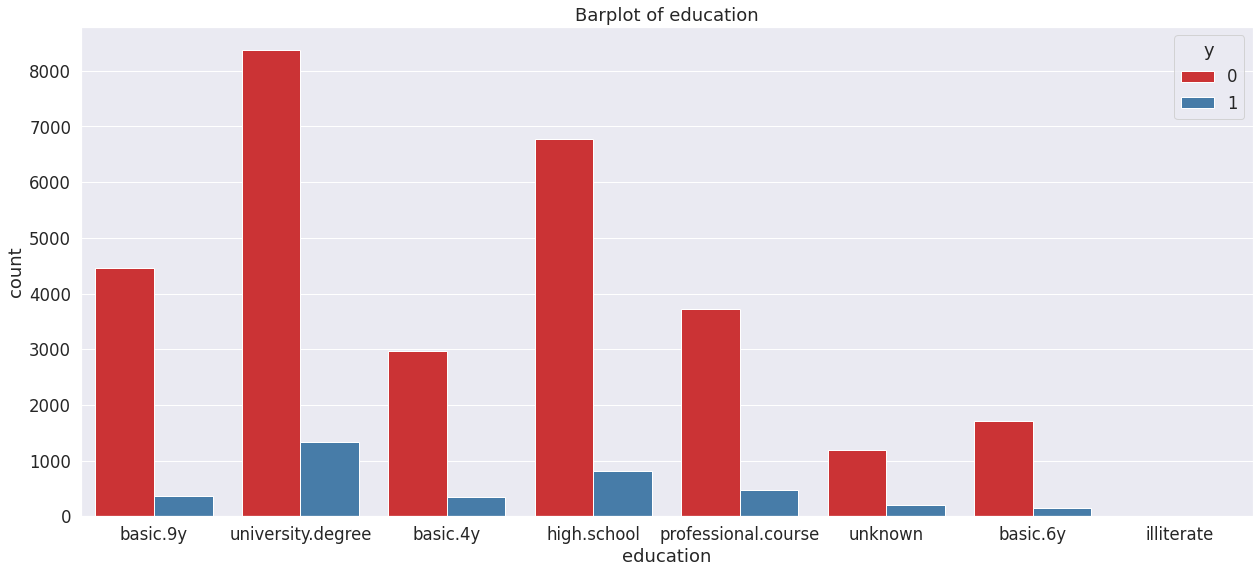

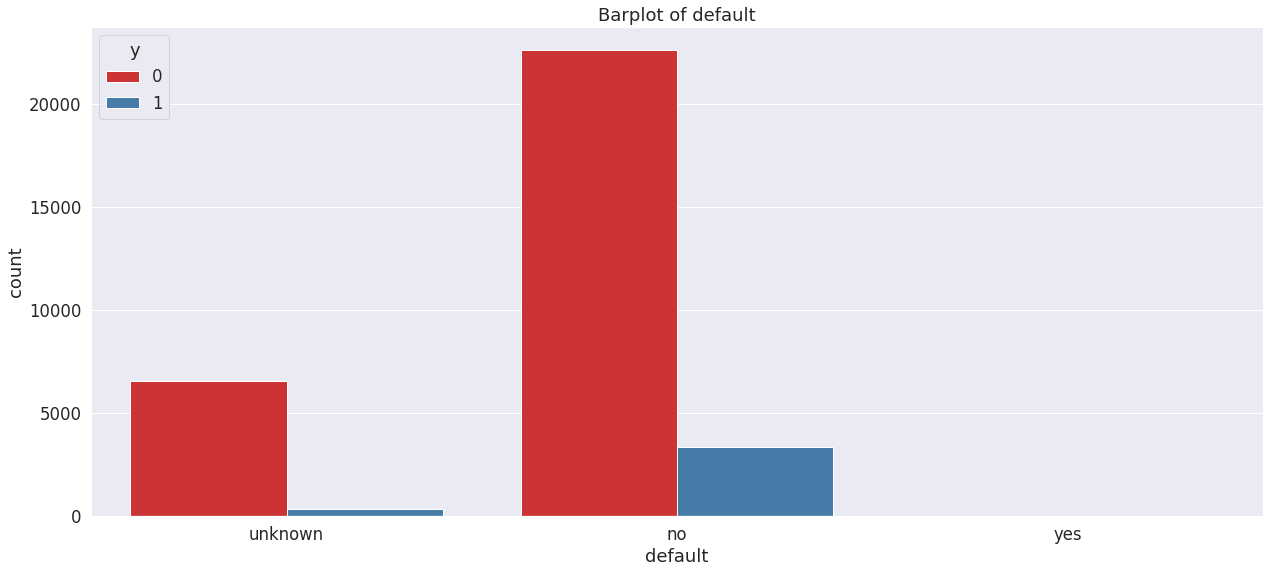

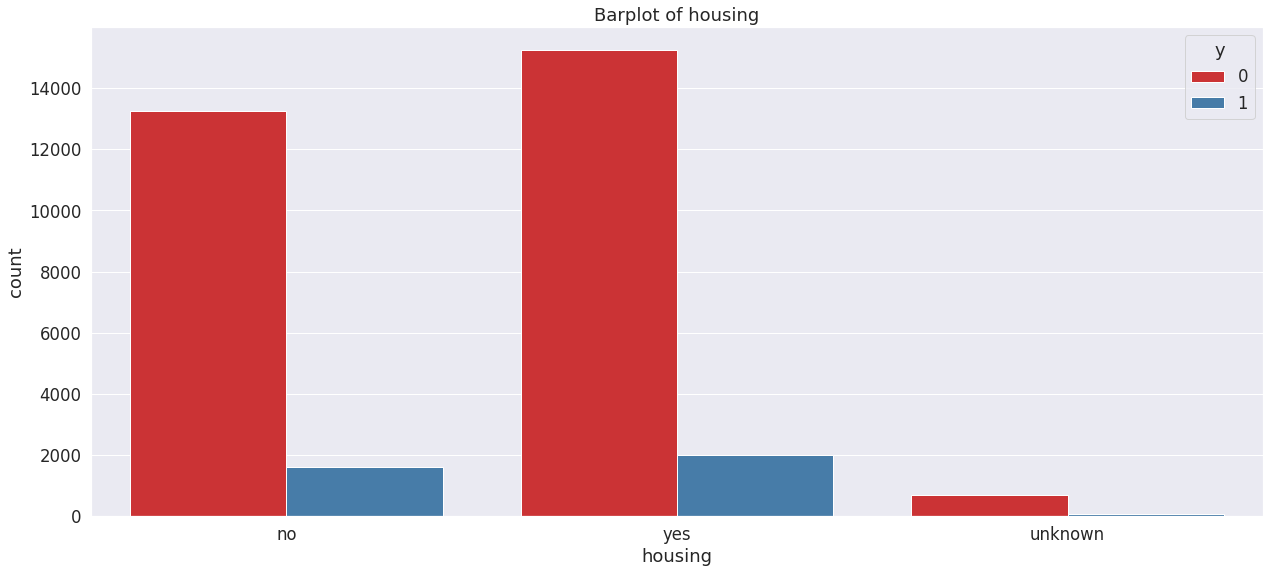

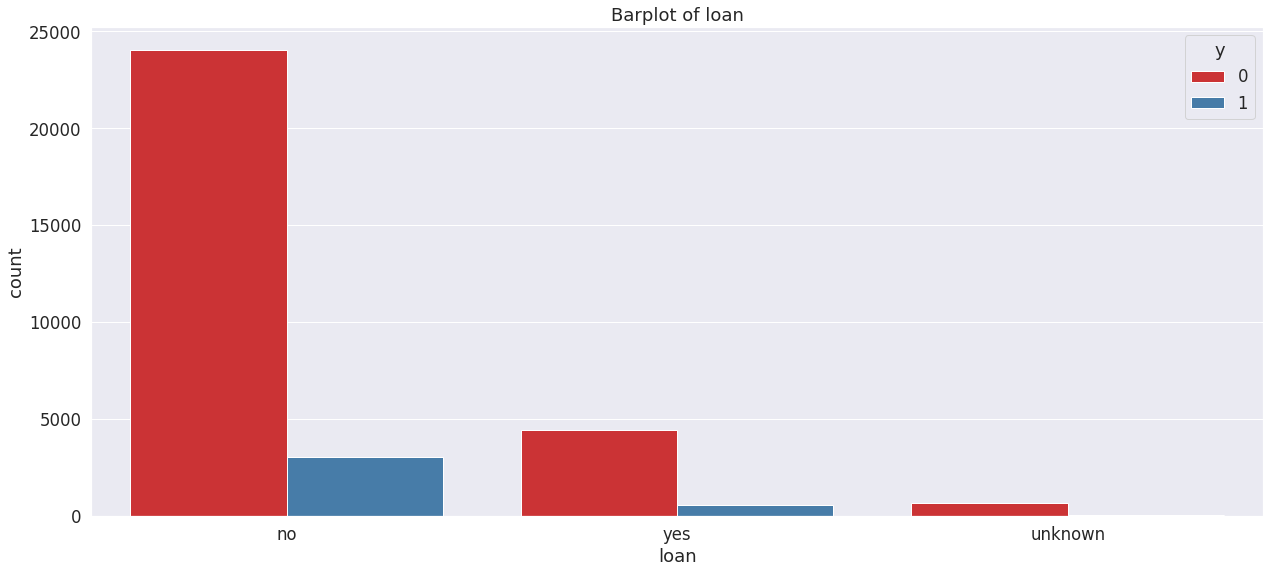

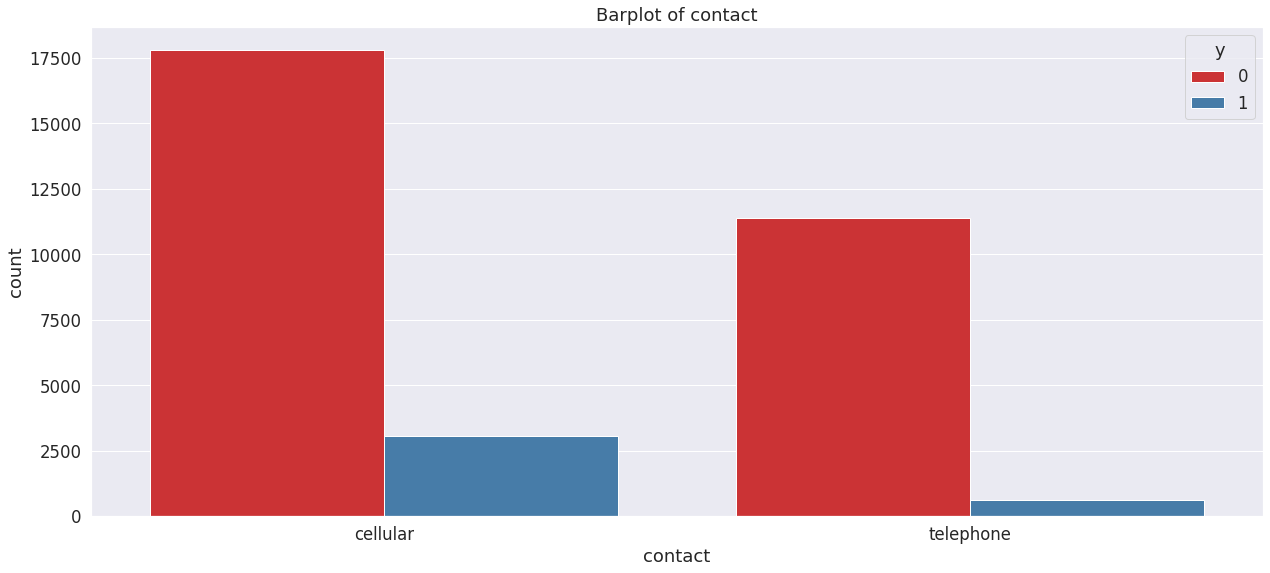

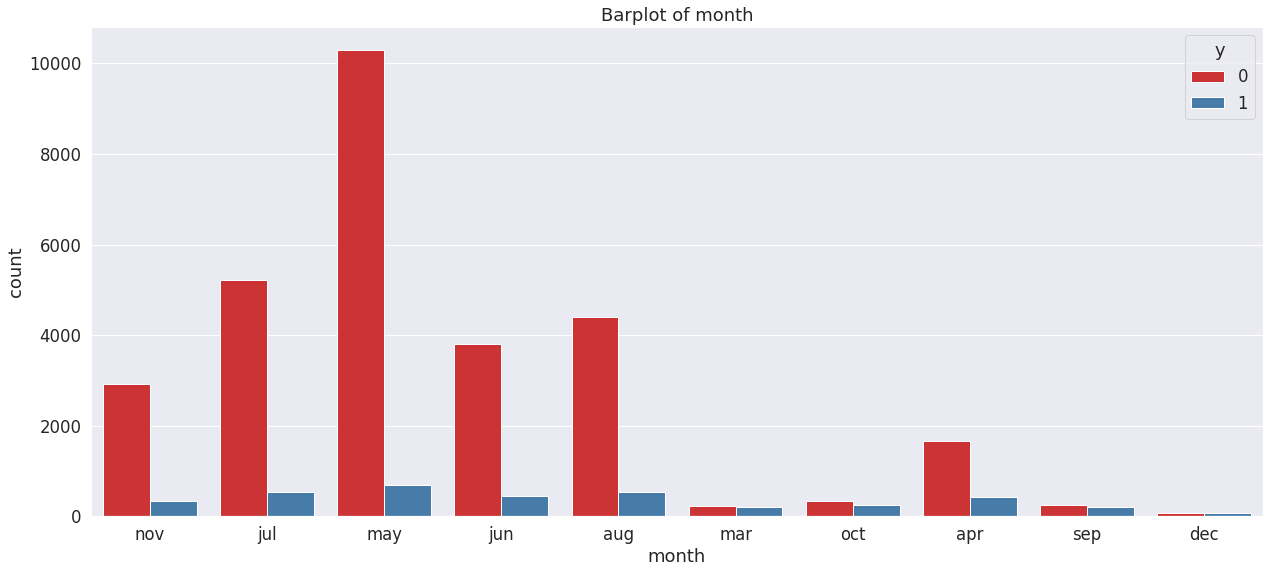

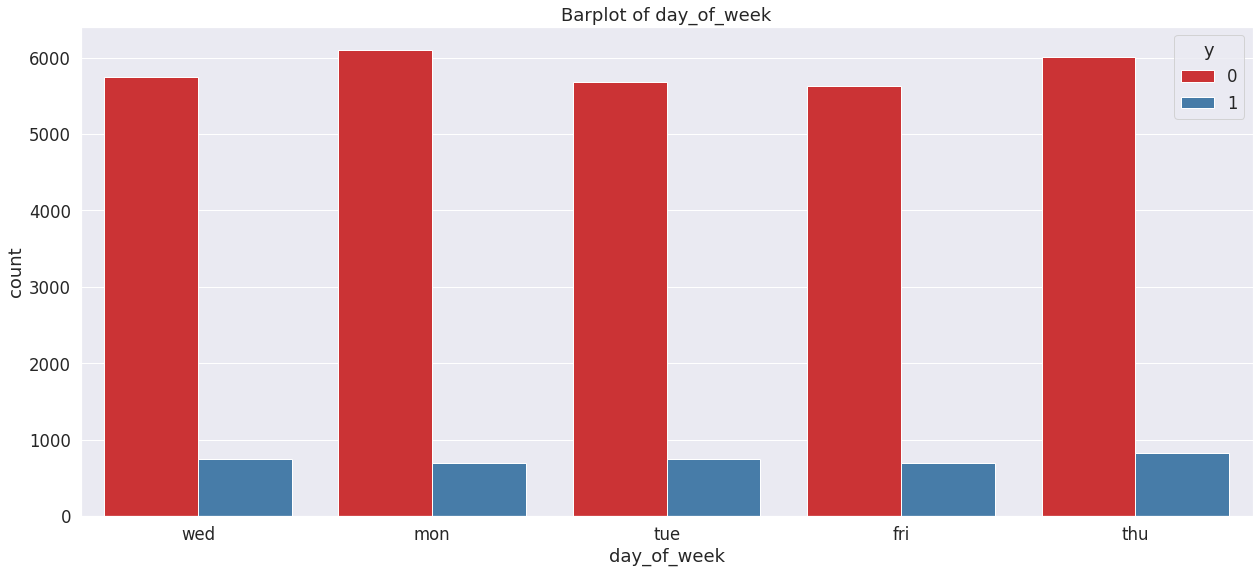

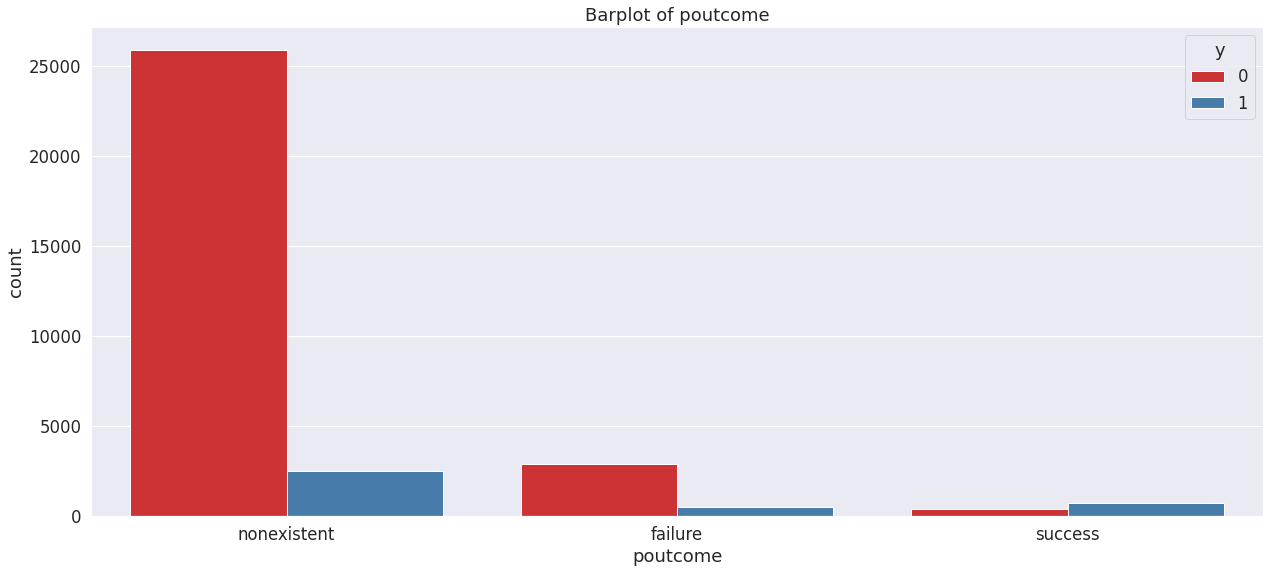

In [ ]:
cat_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for column in cat_list:
    plt.figure(figsize=(21,9))
    sns.countplot(x = column, data = df, hue = 'y', palette = 'Set1')
    plt.title('Barplot of '+column)
    plt.show()

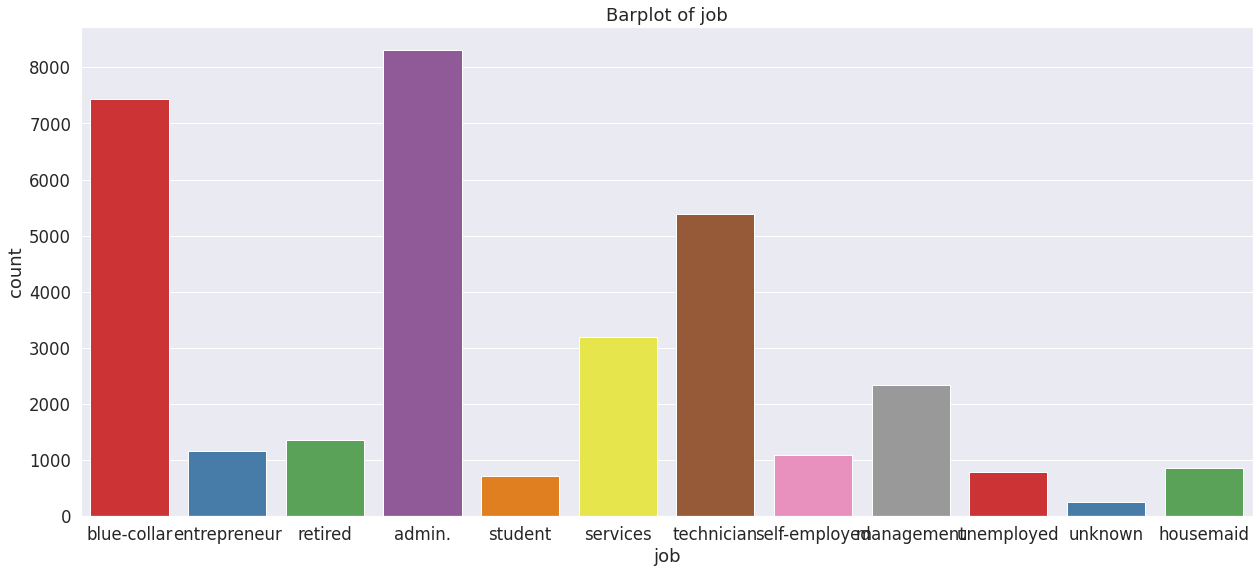

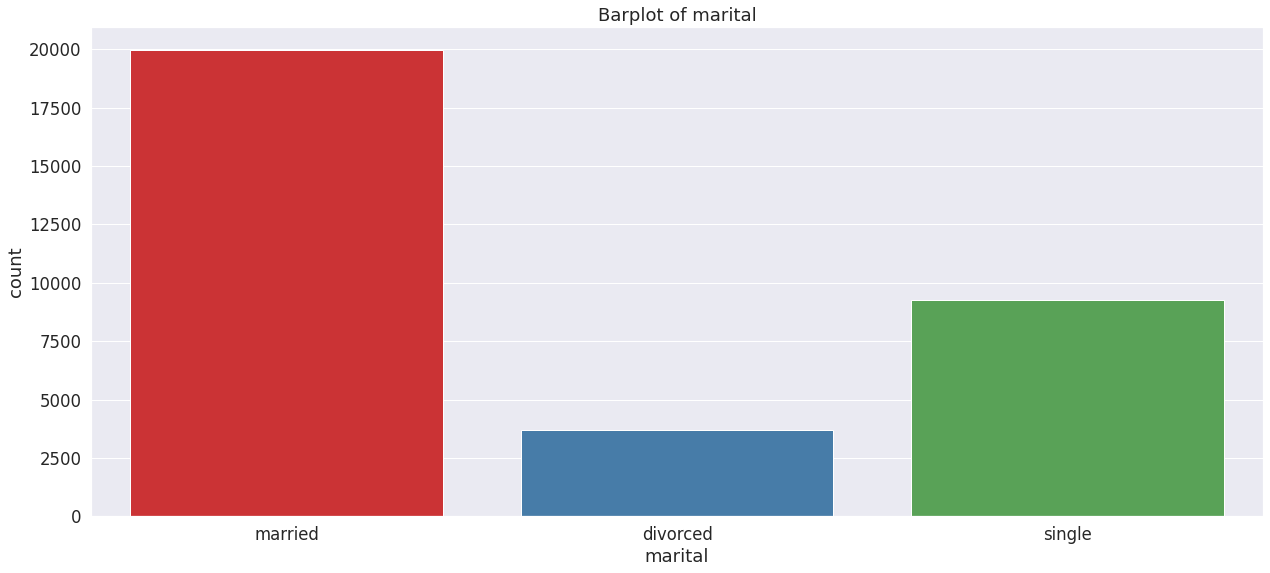

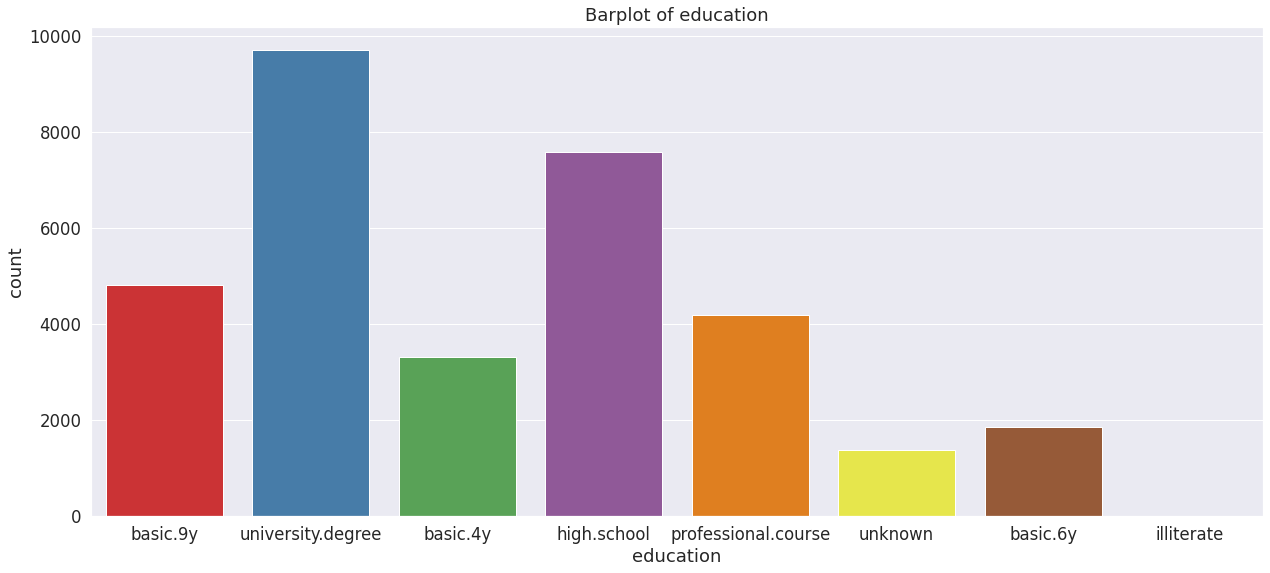

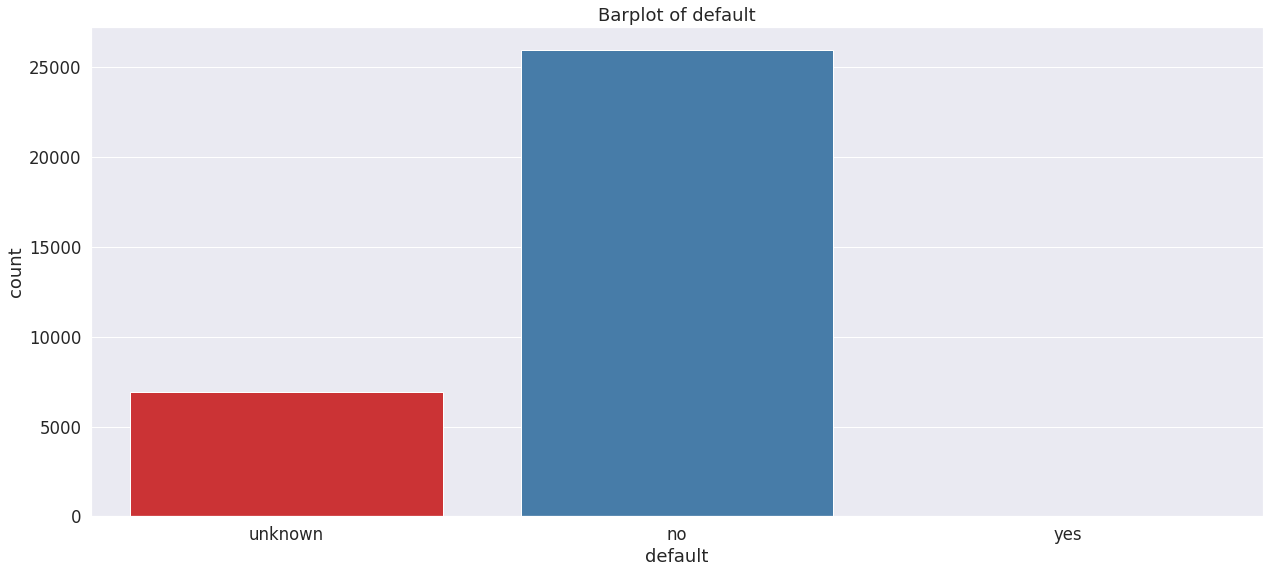

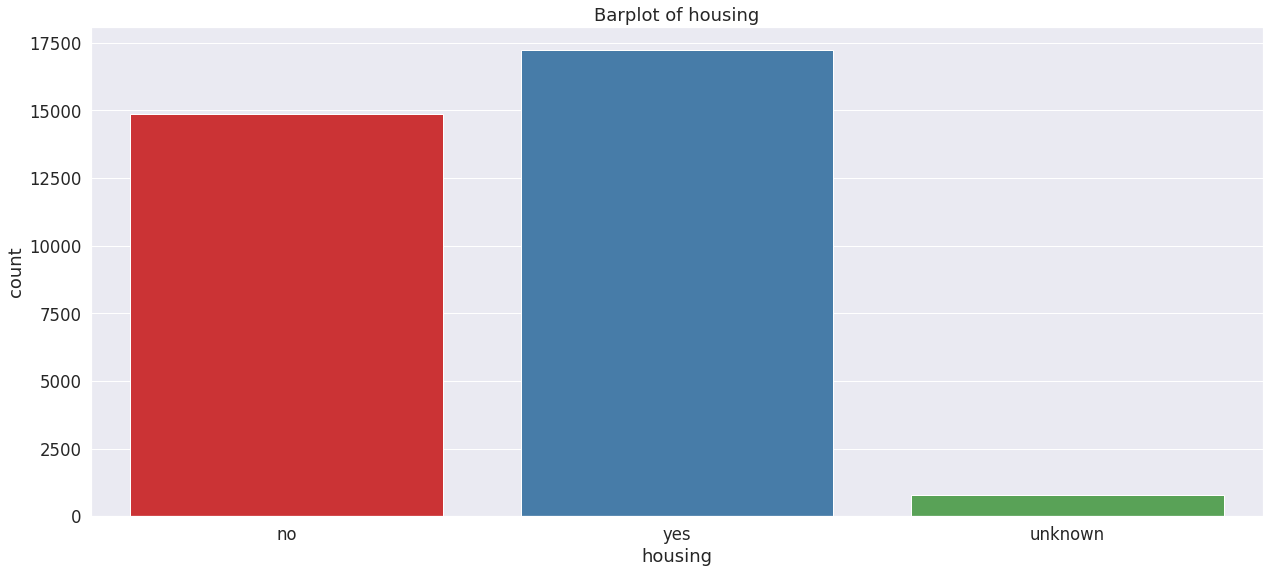

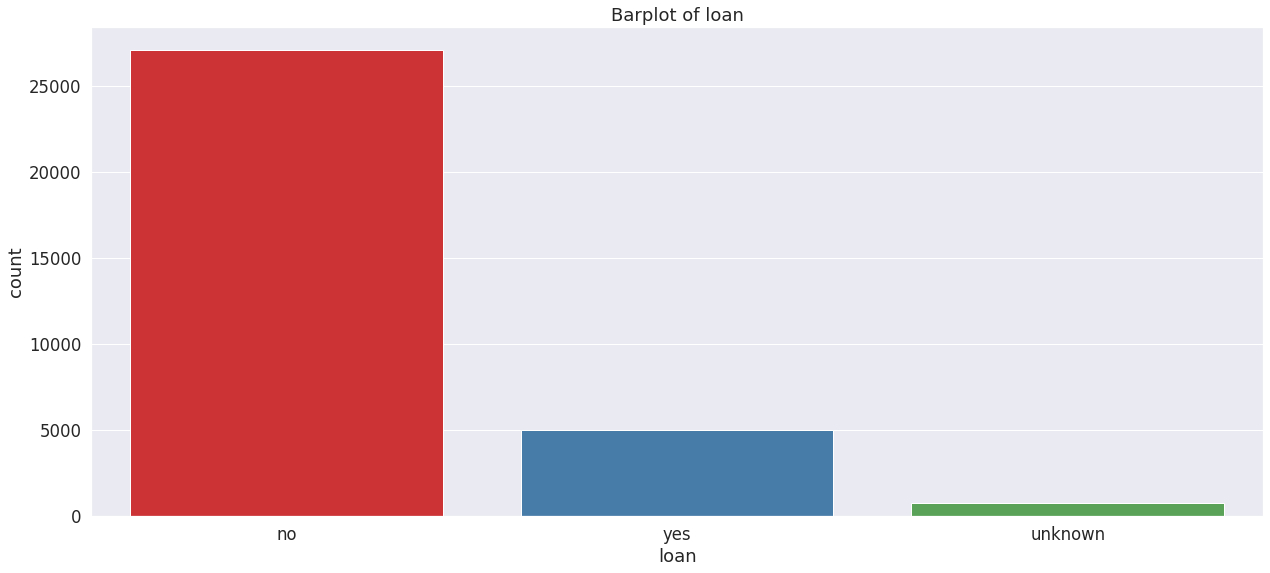

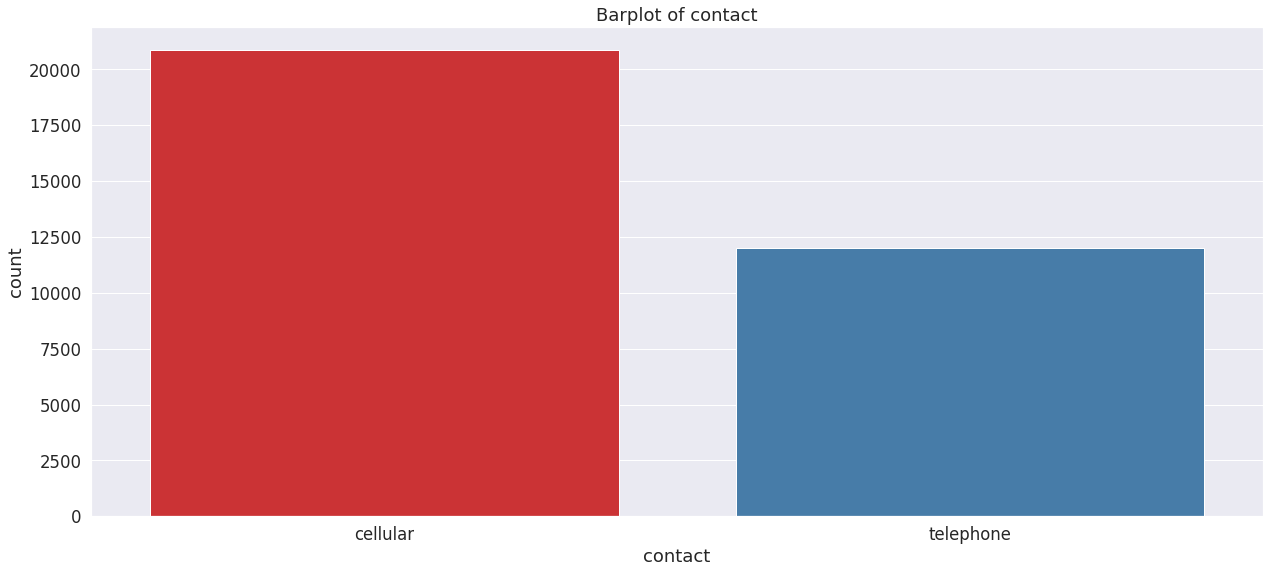

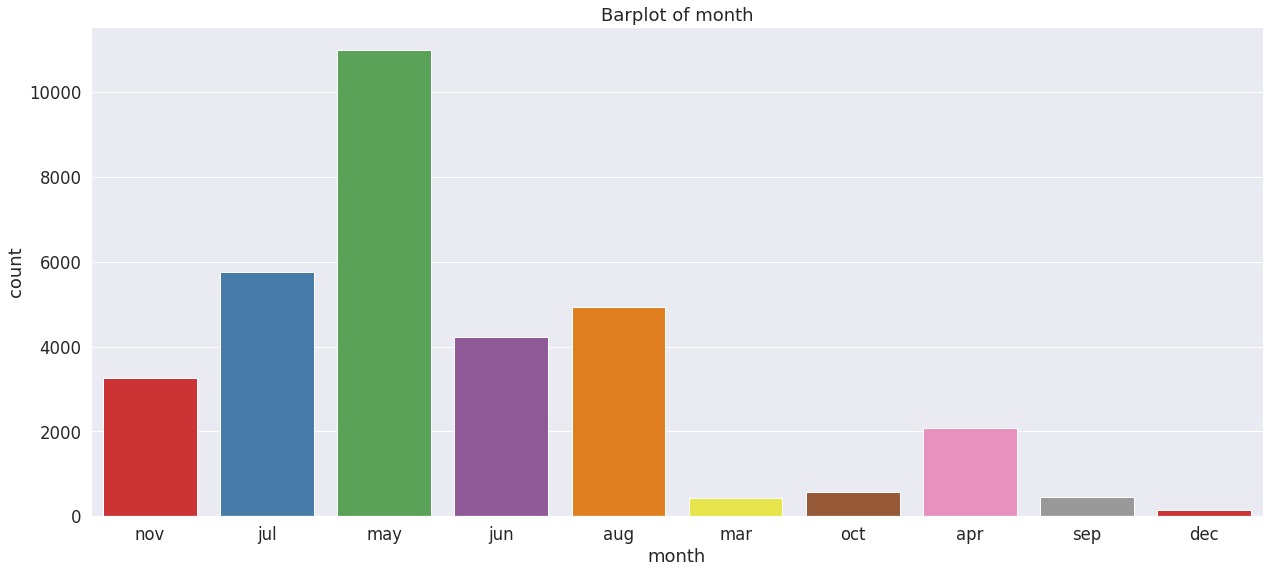

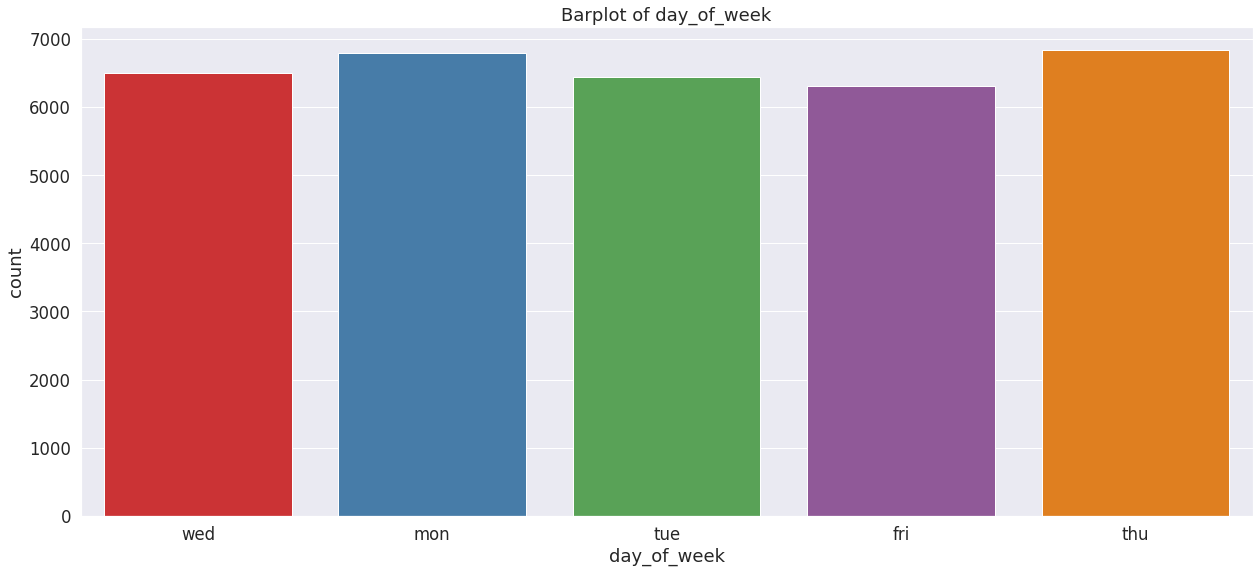

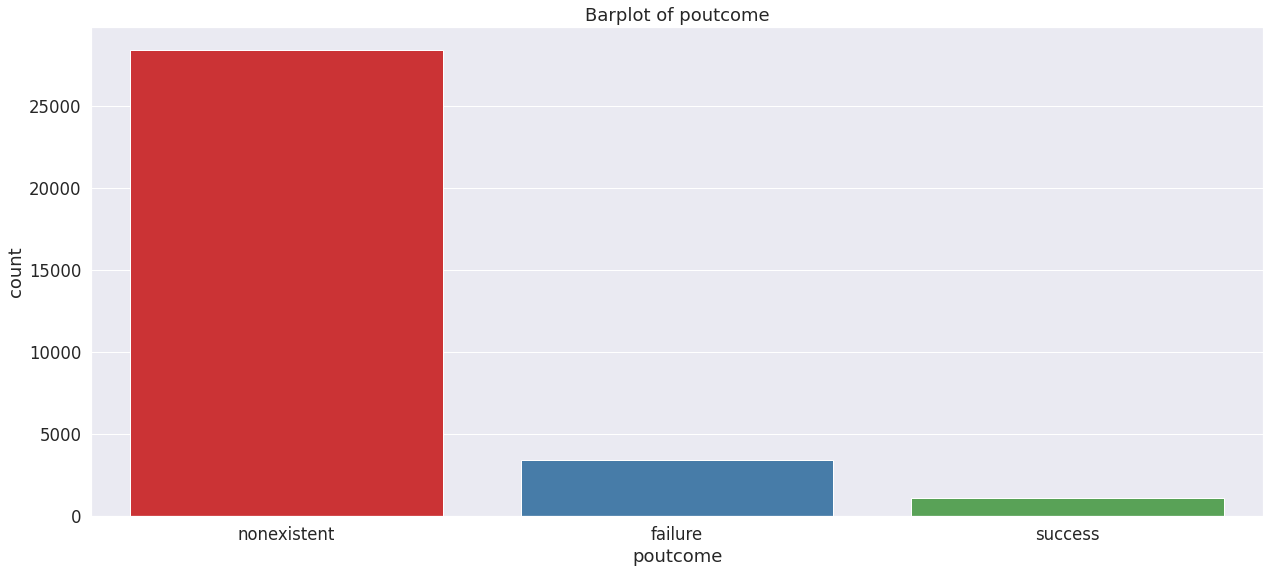

In [ ]:
for column in cat_list:
    plt.figure(figsize=(21,9))
    sns.countplot(x = column, data = df, palette = 'Set1')
    plt.title('Barplot of '+column)
    plt.show()

In [ ]:
df['housing'].value_counts()

yes        17221
no         14861
unknown      795
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no         27070
yes         5012
unknown      795
Name: loan, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     20856
telephone    12021
Name: contact, dtype: int64

In [ ]:
df['default'].value_counts()

no         25945
unknown     6929
yes            3
Name: default, dtype: int64

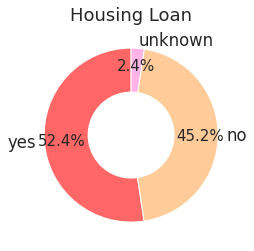

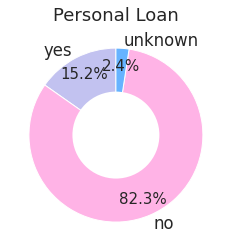

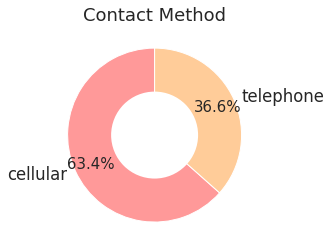

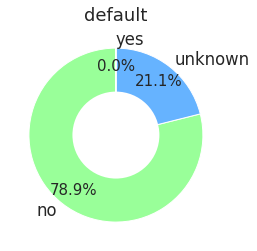

In [ ]:
#Checking data distribution for categorical value using pie chart
# Data to plot
labels_house = ['yes', 'no', 'unknown']
sizes_house = [17221,14861, 795]
colors_house = ['#ff6666', '#ffcc99', '#ffb3e6']

labels_loan = ['yes', 'no', 'unknown']
sizes_loan = [5012, 27070, 795]
colors_loan = ['#c2c2f0','#ffb3e6', '#66b3ff' ]

labels_contact = ['cellular', 'telephone']
sizes_contact = [20856, 12021]
colors_contact = ['#ff9999','#ffcc99']

labels_default = ['no','unknown','yes']
sizes_default = [25945, 6929, 3]
colors_default = ['#99ff99','#66b3ff','#ff6666' ]


# Plot
plt.rcParams.update({'font.size': 15})

plt.figure(0)
plt.pie(sizes_house, labels=labels_house, colors=colors_house, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
plt.title ('Housing Loan')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

plt.figure(1)
plt.pie(sizes_loan,labels=labels_loan, colors=colors_loan, autopct='%1.1f%%',startangle=90,pctdistance=0.8)
plt.title ('Personal Loan')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

plt.figure(2)
plt.pie(sizes_contact, labels=labels_contact, colors=colors_contact, autopct='%1.1f%%', startangle=90,pctdistance=0.8)
plt.title ('Contact Method')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

plt.figure(3)
plt.pie(sizes_default, labels=labels_default, colors=colors_default, autopct='%1.1f%%', startangle=90,pctdistance=0.8)
plt.title ('default')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

**Inferences**


Most of the people in the dataset work as an “admin”

client who married are high in records in given dataset and divorced are less

client who have graduated university are in high numbers in given dataset

data in month of May is high and less in December

Most of the marketing campaign have mostly not made any difference and the success rate is very low

Although communication through cellular mode is higher, there has been decent communication through both modes


# **Dummification**

In [ ]:
ND = pd.get_dummies(df[['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']], drop_first=True)
ND

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
32946,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32947,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
32948,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
a1 = df['y']
a2 = df['age']
a3 = df['duration']
a4 = df['campaign']
CD = pd.concat([a1,a2,a3,a4, ND], axis=1)

In [ ]:
CD['y']  = CD['y'].replace('yes',1)
CD['y']  = CD['y'].replace('no',0)

# **Logistic Regression**

**Model 1**

In [ ]:
X = CD.drop('y',axis='columns')
Y = CD['y']   
test_size = 0.30 
seed = 15  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
LR1 = model.score(X_test, y_test)
print('Accuracy:',LR1)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=LR1  # Accuracy of Logistic regression model

Accuracy: 0.9081508515815085
confusion_matrix:
[[8592  203]
 [ 703  366]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_score(y_test,y_predict)

0.9081508515815085

**Model 2**

In [ ]:
X = CD.drop(['y','marital_married', 'marital_single',
       'loan_unknown', 'loan_yes','campaign'], axis='columns')
Y = CD['y']   
test_size = 0.30 
seed = 15  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
LR1 = model.score(X_test, y_test)
print('Accuracy:',LR1)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=LR1  # Accuracy of Logistic regression model

Accuracy: 0.9096715328467153
confusion_matrix:
[[8582  213]
 [ 678  391]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_score(y_test,y_predict)

0.9096715328467153

**Model 3**

In [ ]:
X = CD.drop(['y','marital_married', 'marital_single',
       'loan_unknown', 'loan_yes','campaign','housing_unknown', 'housing_yes','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed','age'], axis='columns')
Y = CD['y'] 
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
LR2 = model.score(X_test, y_test)
print('Accuracy:',LR2)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=LR2  # Accuracy of Logistic regression model

Accuracy: 0.9090632603406326
confusion_matrix:
[[8578  217]
 [ 680  389]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_score(y_test,y_predict)

0.9090632603406326

**Model 4**

In [ ]:
X = CD.drop(['y','loan_unknown', 'loan_yes','campaign'], axis='columns')
Y = CD['y']   
test_size = 0.30 
seed = 15  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
LR2 = model.score(X_test, y_test)
print('Accuracy:',LR2)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))
A=LR2  # Accuracy of Logistic regression model

Accuracy: 0.9096715328467153
confusion_matrix:
[[8586  209]
 [ 682  387]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_score(y_test,y_predict)

0.9096715328467153

# **Artificial Neural Networks**

In [ ]:
import tensorflow as tf
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
x = CD.drop(['y'],axis=1)
y = CD.y


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test


22796    0
30045    0
3195     0
11296    0
31679    0
        ..
27878    1
5956     0
4475     0
2771     0
19914    0
Name: y, Length: 6576, dtype: int64

## **ADAM**

**Model 1**

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
822/822 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.8884 - precision: 0.5136 - a=recall: 0.1973
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2337 - accuracy: 0.8923 - precision: 0.5713 - a=recall: 0.1798
Epoch 3/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2311 - accuracy: 0.8935 - precision: 0.5809 - a=recall: 0.1987
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2260 - accuracy: 0.8960 - precision: 0.5976 - a=recall: 0.2384
Epoch 5/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2223 - accuracy: 0.8990 - precision: 0.6009 - a=recall: 0.3093
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2243 - accuracy: 0.8994 - precision: 0.6151 - a=recall: 0.2867
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2194 - accuracy: 0.9010 - precision: 0.6124 - a=recall: 0.3325
Epoch 8/200
822/822 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                460       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions=model.predict(x_test)
predictions=np.rint(predictions)
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5840
           1       0.59      0.51      0.55       736

    accuracy                           0.91      6576
   macro avg       0.76      0.73      0.75      6576
weighted avg       0.90      0.91      0.90      6576

[[5578  262]
 [ 362  374]]


**Model 2**

In [ ]:
model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model2.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.2753 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2428 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 3ms/step - loss: 0.2432 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2341 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 3ms/step - loss: 0.2328 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2287 - accuracy: 0.8886 - precision: 0.5149 - a=recall: 0.2037
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2279 - accuracy: 0.8924 - precision: 0.5417 - a=recall:

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 45)                2070      
                                                                 
 dense_5 (Dense)             (None, 2)                 92        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 2,165
Trainable params: 2,165
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions2=model2.predict(x_test)
predictions2=np.rint(predictions2)
predictions2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test,predictions2))
print(metrics.confusion_matrix(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5840
           1       0.62      0.48      0.54       736

    accuracy                           0.91      6576
   macro avg       0.78      0.72      0.74      6576
weighted avg       0.90      0.91      0.90      6576

[[5624  216]
 [ 385  351]]


**Model 3**

In [ ]:
model3= tf.keras.Sequential([
                            tf.keras.layers.Dense(40, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model3.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model3.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.8864 - precision: 0.2051 - a=recall: 0.0027
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2443 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2398 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2330 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2322 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2290 - accuracy: 0.8913 - precision: 0.5302 - a=recall: 0.3110
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2238 - accuracy: 0.8963 - precision: 0.5685 - a=recall: 0.3319


**Model 4**

In [ ]:
model4= tf.keras.Sequential([
                            tf.keras.layers.Dense(35, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model4.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model4.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8845 - precision: 0.4102 - a=recall: 0.0570
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2442 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2360 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2285 - accuracy: 0.8883 - precision: 0.5109 - a=recall: 0.2142
Epoch 5/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2259 - accuracy: 0.8933 - precision: 0.5405 - a=recall: 0.3578
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2259 - accuracy: 0.8970 - precision: 0.5546 - a=recall: 0.4384
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.2242 - accuracy: 0.8950 - precision: 0.5510 - a=recall: 0.3717
Epoch 8/200
822/

**Model 5**

In [ ]:
model5= tf.keras.Sequential([
                            tf.keras.layers.Dense(11, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model5.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model5.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.3724 - accuracy: 0.8856 - precision: 0.1311 - a=recall: 0.0027
Epoch 2/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3531 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3530 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3531 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3529 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3527 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3526 - accuracy: 0.8873 - precision: 0.0000e+00 - a=rec

**Model 6**

In [ ]:
model6= tf.keras.Sequential([
                            tf.keras.layers.Dense(11, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )



history= model6.fit(x_train, y_train, epochs= 400)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


822/822 [==============================] - 4s 3ms/step - loss: 0.2838 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/400
822/822 [==============================] - 2s 2ms/step - loss: 0.2337 - accuracy: 0.8877 - precision: 0.5138 - a=recall: 0.0755
Epoch 3/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2330 - accuracy: 0.8894 - precision: 0.5266 - a=recall: 0.1872
Epoch 4/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2257 - accuracy: 0.8968 - precision: 0.5605 - a=recall: 0.3922
Epoch 5/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2276 - accuracy: 0.8985 - precision: 0.5783 - a=recall: 0.3686
Epoch 6/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2275 - accuracy: 0.8943 - precision: 0.5475 - a=recall: 0.3599
Epoch 7/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2251 - accuracy: 0.8975 - precision: 0.5703 - a=recall: 0.3666
Epoch 8/400
822/822 [===

## **SGD**

**Model 1**

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


822/822 [==============================] - 4s 3ms/step - loss: 0.3684 - accuracy: 0.8846 - precision: 0.1759 - a=recall: 0.0064
Epoch 2/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3172 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3139 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3127 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3122 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3105 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3107 - accuracy: 0.8873 - precision: 0.0000e+00 - a=rec

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                460       
                                                                 
 dense_31 (Dense)            (None, 7)                 77        
                                                                 
 dense_32 (Dense)            (None, 5)                 40        
                                                                 
 dense_33 (Dense)            (None, 1)                 6         
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions=model.predict(x_test)
predictions=np.rint(predictions)
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5840
           1       0.62      0.21      0.31       736

    accuracy                           0.90      6576
   macro avg       0.77      0.60      0.63      6576
weighted avg       0.88      0.90      0.87      6576

[[5748   92]
 [ 583  153]]


**Model 2**

In [ ]:
model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model2.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.3689 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3249 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3201 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3179 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3169 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 3s 3ms/step - loss: 0.3150 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3145 - accuracy: 0.8873 - precision: 0.0000e+00

In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 45)                2070      
                                                                 
 dense_35 (Dense)            (None, 2)                 92        
                                                                 
 dense_36 (Dense)            (None, 1)                 3         
                                                                 
Total params: 2,165
Trainable params: 2,165
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions2=model2.predict(x_test)
predictions2=np.rint(predictions2)
predictions2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5840
           1       0.67      0.07      0.13       736

    accuracy                           0.89      6576
   macro avg       0.78      0.53      0.53      6576
weighted avg       0.87      0.89      0.85      6576



In [ ]:
print(metrics.confusion_matrix(y_test,predictions2))

[[5815   25]
 [ 685   51]]


**Model 3**

In [ ]:
model3= tf.keras.Sequential([
                            tf.keras.layers.Dense(40, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model3.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model3.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


822/822 [==============================] - 4s 3ms/step - loss: 0.4614 - accuracy: 0.8854 - precision: 0.1000 - a=recall: 0.0020
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3615 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3537 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3525 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 3ms/step - loss: 0.3522 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8873 - precision: 0.0000e+00 - a=rec

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 40)                1840      
                                                                 
 dense_38 (Dense)            (None, 5)                 205       
                                                                 
 dense_39 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions3=model3.predict(x_test)
predictions3=np.rint(predictions3)
predictions3

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test,predictions3))
print(metrics.confusion_matrix(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5840
           1       0.63      0.04      0.07       736

    accuracy                           0.89      6576
   macro avg       0.76      0.52      0.51      6576
weighted avg       0.86      0.89      0.84      6576

[[5823   17]
 [ 707   29]]


**Model 4**

In [ ]:
model4= tf.keras.Sequential([
                            tf.keras.layers.Dense(35, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model4.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model4.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.3829 - accuracy: 0.8857 - precision: 0.1525 - a=recall: 0.0030
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3191 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3161 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3152 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3150 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3135 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3136 - accuracy: 0.8873 - precision: 0.0000e+00 - a=rec

In [ ]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 35)                1610      
                                                                 
 dense_41 (Dense)            (None, 5)                 180       
                                                                 
 dense_42 (Dense)            (None, 5)                 30        
                                                                 
 dense_43 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,826
Trainable params: 1,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions4=model4.predict(x_test)
predictions4=np.rint(predictions3)
predictions4

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test,predictions4))
print(metrics.confusion_matrix(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5840
           1       0.63      0.04      0.07       736

    accuracy                           0.89      6576
   macro avg       0.76      0.52      0.51      6576
weighted avg       0.86      0.89      0.84      6576

[[5823   17]
 [ 707   29]]


**Model 5**

In [ ]:
model5= tf.keras.Sequential([
                            tf.keras.layers.Dense(11, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model5.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model5.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.4189 - accuracy: 0.8865 - precision: 0.1875 - a=recall: 0.0020
Epoch 2/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3526 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 3/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3523 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 4/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 5/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 6/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 7/200
822/822 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8873 - precision: 0.0000e+00 - a=rec

In [ ]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 11)                506       
                                                                 
 dense_45 (Dense)            (None, 10)                120       
                                                                 
 dense_46 (Dense)            (None, 4)                 44        
                                                                 
 dense_47 (Dense)            (None, 4)                 20        
                                                                 
 dense_48 (Dense)            (None, 3)                 15        
                                                                 
 dense_49 (Dense)            (None, 7)                 28        
                                                                 
 dense_50 (Dense)            (None, 7)               

In [ ]:
predictions5=model5.predict(x_test)
predictions5=np.rint(predictions3)
predictions5

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test,predictions5))
print(metrics.confusion_matrix(y_test,predictions5))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5840
           1       0.63      0.04      0.07       736

    accuracy                           0.89      6576
   macro avg       0.76      0.52      0.51      6576
weighted avg       0.86      0.89      0.84      6576

[[5823   17]
 [ 707   29]]


**Model 6**

In [ ]:
model6= tf.keras.Sequential([
                            tf.keras.layers.Dense(11, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )



history= model6.fit(x_train, y_train, epochs= 400)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


822/822 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8873 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2337 - accuracy: 0.8877 - precision: 0.5138 - a=recall: 0.0755
Epoch 3/400
822/822 [==============================] - 2s 2ms/step - loss: 0.2330 - accuracy: 0.8894 - precision: 0.5266 - a=recall: 0.1872
Epoch 4/400
822/822 [==============================] - 2s 2ms/step - loss: 0.2257 - accuracy: 0.8968 - precision: 0.5605 - a=recall: 0.3922
Epoch 5/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2276 - accuracy: 0.8985 - precision: 0.5783 - a=recall: 0.3686
Epoch 6/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2275 - accuracy: 0.8943 - precision: 0.5475 - a=recall: 0.3599
Epoch 7/400
822/822 [==============================] - 2s 3ms/step - loss: 0.2251 - accuracy: 0.8975 - precision: 0.5703 - a=recall: 0.3666
Epoch 8/400
822/822 [===

In [ ]:
model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 11)                506       
                                                                 
 dense_53 (Dense)            (None, 10)                120       
                                                                 
 dense_54 (Dense)            (None, 4)                 44        
                                                                 
 dense_55 (Dense)            (None, 4)                 20        
                                                                 
 dense_56 (Dense)            (None, 3)                 15        
                                                                 
 dense_57 (Dense)            (None, 7)                 28        
                                                                 
 dense_58 (Dense)            (None, 7)               

In [ ]:
predictions6=model6.predict(x_test)
predictions6=np.rint(predictions3)
predictions6

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test,predictions6))
print(metrics.confusion_matrix(y_test,predictions6))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5840
           1       0.63      0.04      0.07       736

    accuracy                           0.89      6576
   macro avg       0.76      0.52      0.51      6576
weighted avg       0.86      0.89      0.84      6576

[[5823   17]
 [ 707   29]]


# **Bagging Classifier**

In [ ]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32877 entries, 0 to 32949
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   y                              32877 non-null  int64
 1   age                            32877 non-null  int64
 2   duration                       32877 non-null  int64
 3   campaign                       32877 non-null  int64
 4   job_blue-collar                32877 non-null  uint8
 5   job_entrepreneur               32877 non-null  uint8
 6   job_housemaid                  32877 non-null  uint8
 7   job_management                 32877 non-null  uint8
 8   job_retired                    32877 non-null  uint8
 9   job_self-employed              32877 non-null  uint8
 10  job_services                   32877 non-null  uint8
 11  job_student                    32877 non-null  uint8
 12  job_technician                 32877 non-null  uint8
 13  job_unemployed  

In [ ]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

bgcl = bgcl.fit(train_set, train_labels)

Prediction and Confusion Matrix

In [ ]:
y_predict = bgcl.predict(test_set)

BGC=bgcl.score(test_set , test_labels)
print(BGC)

print(metrics.confusion_matrix(test_labels, y_predict))

0.8784016186140617
[[8673  114]
 [1088   10]]


Accuracy Score

In [ ]:
accuracy_score(test_labels,y_predict)

0.8784016186140617

Precision and Recall

In [ ]:
#print('Precision: %.3f' % precision_score(test_labels,y_predict))
#print('Recall: %.3f' % recall_score(test_labels,y_predict))

# **Boosting Classifier**

In [ ]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

**Applying AdaBoost Ensemble Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)

abcl = abcl.fit(train_set, train_labels)

Prediction and Confusion Matrix

In [ ]:
y_predict = abcl.predict(test_set)

ADE=abcl.score(test_set , test_labels)
print(ADE)

print(metrics.confusion_matrix(test_labels, y_predict))

0.8324734446130501
[[8143  644]
 [1012   86]]


Accuracy Score

In [ ]:
accuracy_score(test_labels,y_predict)

0.8324734446130501

Precision and Recall


In [ ]:
#print('Precision: %.3f' % precision_score(test_labels,y_predict))
#print('Recall: %.3f' % recall_score(test_labels,y_predict))

**Applying GradientBoost Classifier Algorithm**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(train_set, train_labels)

Prediction and Confusion Matrix

In [ ]:
y_predict = gbcl.predict(test_set)
GBC=gbcl.score(test_set , test_labels)
print(GBC)
print(metrics.confusion_matrix(test_labels, y_predict))

0.8889226100151745
[[8787    0]
 [1098    0]]


Accuracy Score

In [ ]:
accuracy_score(test_labels,y_predict)

0.8889226100151745

Precision and Recall

In [ ]:
print('Precision: %.3f' % precision_score(test_labels,y_predict))
print('Recall: %.3f' % recall_score(test_labels,y_predict))

Precision: 0.000
Recall: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Tree**

## **Preprocessing**

In [ ]:
# Label encoder order in alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
my_data['job']      = labelencoder_X.fit_transform(my_data['job']) 
my_data['marital']  = labelencoder_X.fit_transform(my_data['marital']) 
my_data['education']= labelencoder_X.fit_transform(my_data['education']) 
my_data['default']  = labelencoder_X.fit_transform(my_data['default']) 
my_data['housing']  = labelencoder_X.fit_transform(my_data['housing']) 
my_data['loan']     = labelencoder_X.fit_transform(my_data['loan']) 

my_data['contact']     = labelencoder_X.fit_transform(my_data['contact']) 
my_data['month']       = labelencoder_X.fit_transform(my_data['month']) 

In [ ]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(my_data);

In [ ]:
my_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,2,1,0,0,0,7,wed,227,4,999,0,nonexistent,no
1,2,2,1,6,0,0,0,1,7,wed,202,2,999,1,failure,no
2,4,5,1,0,0,0,0,0,3,mon,1148,1,999,0,nonexistent,yes
3,2,0,1,6,0,2,0,1,6,mon,120,2,999,0,nonexistent,no
4,3,5,0,6,0,0,0,0,4,tue,368,2,999,0,nonexistent,no


In [ ]:
print(my_data.shape)
my_data.head()

(32950, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,2,1,0,0,0,7,wed,227,4,999,0,nonexistent,no
1,2,2,1,6,0,0,0,1,7,wed,202,2,999,1,failure,no
2,4,5,1,0,0,0,0,0,3,mon,1148,1,999,0,nonexistent,yes
3,2,0,1,6,0,2,0,1,6,mon,120,2,999,0,nonexistent,no
4,3,5,0,6,0,0,0,0,4,tue,368,2,999,0,nonexistent,no


In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(my_data);

In [ ]:
my_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,2,1,0,0,0,7,wed,3,4,999,0,nonexistent,no
1,2,2,1,6,0,0,0,1,7,wed,3,2,999,1,failure,no
2,4,5,1,0,0,0,0,0,3,mon,5,1,999,0,nonexistent,yes
3,2,0,1,6,0,2,0,1,6,mon,2,2,999,0,nonexistent,no
4,3,5,0,6,0,0,0,0,4,tue,4,2,999,0,nonexistent,no


In [ ]:
my_data.loc[(my_data['pdays'] == 999), 'pdays'] = 1
my_data.loc[(my_data['pdays'] > 0) & (my_data['pdays'] <= 10), 'pdays'] = 2
my_data.loc[(my_data['pdays'] > 10) & (my_data['pdays'] <= 20), 'pdays'] = 3
my_data.loc[(my_data['pdays'] > 20) & (my_data['pdays'] != 999), 'pdays'] = 4 
my_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,2,1,0,0,0,7,wed,3,4,2,0,nonexistent,no
1,2,2,1,6,0,0,0,1,7,wed,3,2,2,1,failure,no
2,4,5,1,0,0,0,0,0,3,mon,5,1,2,0,nonexistent,yes
3,2,0,1,6,0,2,0,1,6,mon,2,2,2,0,nonexistent,no
4,3,5,0,6,0,0,0,0,4,tue,4,2,2,0,nonexistent,no


In [ ]:
my_data['poutcome'].replace(['unknown', 'failure','other', 'success'], [1,2,3,4], inplace  = True)

In [ ]:
print(my_data.shape)
my_data.head()

(32950, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,2,1,0,0,0,7,wed,3,4,2,0,nonexistent,no
1,2,2,1,6,0,0,0,1,7,wed,3,2,2,1,2,no
2,4,5,1,0,0,0,0,0,3,mon,5,1,2,0,nonexistent,yes
3,2,0,1,6,0,2,0,1,6,mon,2,2,2,0,nonexistent,no
4,3,5,0,6,0,0,0,0,4,tue,4,2,2,0,nonexistent,no


In [ ]:
Final_data=my_data
print(Final_data.shape)
Final_data.head()

(32950, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,2,1,0,0,0,7,wed,3,4,2,0,nonexistent,no
1,2,2,1,6,0,0,0,1,7,wed,3,2,2,1,2,no
2,4,5,1,0,0,0,0,0,3,mon,5,1,2,0,nonexistent,yes
3,2,0,1,6,0,2,0,1,6,mon,2,2,2,0,nonexistent,no
4,3,5,0,6,0,0,0,0,4,tue,4,2,2,0,nonexistent,no


In [ ]:
Final_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,3,1,1,2,1,0,0,0,7,wed,3,4,2,0,nonexistent,no
1,2,2,1,6,0,0,0,1,7,wed,3,2,2,1,2,no
2,4,5,1,0,0,0,0,0,3,mon,5,1,2,0,nonexistent,yes
3,2,0,1,6,0,2,0,1,6,mon,2,2,2,0,nonexistent,no
4,3,5,0,6,0,0,0,0,4,tue,4,2,2,0,nonexistent,no


## **Decision Tree Algorithm**

In [ ]:
X = Final_data.drop(['y'],axis=1)
Y = Final_data.y

In [ ]:
for feature in my_data.columns: # Loop through all columns in the dataframe
    if my_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        my_data[feature] = pd.Categorical(my_data[feature]).codes # Replace strings with an integer

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          32950 non-null  int64
 1   job          32950 non-null  int64
 2   marital      32950 non-null  int64
 3   education    32950 non-null  int64
 4   default      32950 non-null  int64
 5   housing      32950 non-null  int64
 6   loan         32950 non-null  int64
 7   contact      32950 non-null  int64
 8   month        32950 non-null  int64
 9   day_of_week  32950 non-null  int8 
 10  duration     32950 non-null  int64
 11  campaign     32950 non-null  int64
 12  pdays        32950 non-null  int64
 13  previous     32950 non-null  int64
 14  poutcome     32950 non-null  int8 
 15  y            32950 non-null  int8 
dtypes: int64(13), int8(3)
memory usage: 3.4 MB


In [ ]:
train_char_label = ['No', 'Yes']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

In [ ]:
# splitting data into training and test set for independent attributes in the ratio of 70:30 
n=my_data['y'].count()
train_set = my_data.head(int(round(n*0.7))) # Up to the last initial training set row
test_set = my_data.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("y") into separate vectors for training set and test set
train_labels = train_set.pop("y")
test_labels = test_set.pop("y")

In [ ]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns.
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [ ]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#Print the accuracy of the model & print the confusion matrix
dt_model.score(test_set , test_labels)
test_pred = dt_model.predict(test_set)

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))#Print the feature importance of the decision model

                  Imp
age          0.055509
job          0.093750
marital      0.050392
education    0.085473
default      0.016064
housing      0.039474
loan         0.024683
contact      0.023671
month        0.137104
day_of_week  0.080586
duration     0.191816
campaign     0.082887
pdays        0.004158
previous     0.011803
poutcome     0.102630


In [ ]:
y_predict = dt_model.predict(test_set)

In [ ]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

0.9967916756991112
0.8669701568032372


In [ ]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[8076  677]
 [ 638  494]]


In [ ]:
accuracy_score(test_labels,y_predict)

0.8669701568032372

## **Dealing with overfitting**

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                  Imp
age          0.055509
job          0.093750
marital      0.050392
education    0.085473
default      0.016064
housing      0.039474
loan         0.024683
contact      0.023671
month        0.137104
day_of_week  0.080586
duration     0.191816
campaign     0.082887
pdays        0.004158
previous     0.011803
poutcome     0.102630


In [ ]:
y_predict = reg_dt_model.predict(test_set)

In [ ]:
DTC=reg_dt_model.score(test_set , test_labels)
print(DTC)

0.9035912999494183


In [ ]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[8446  307]
 [ 646  486]]


In [ ]:
accuracy_score(test_labels,y_predict)

0.9035912999494183

In [ ]:
print('Precision: %.3f' % precision_score(test_labels,y_predict))
print('Recall: %.3f' % recall_score(test_labels, y_predict))

Precision: 0.613
Recall: 0.429


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

Prediction and Confusion Matrix

In [ ]:
y_predict = rfcl.predict(test_set)
RFC=rfcl.score(test_set , test_labels)
print(RFC)
print(metrics.confusion_matrix(test_labels, y_predict))

0.8976226605968639
[[8463  290]
 [ 722  410]]


Accuracy Score

In [ ]:
accuracy_score(test_labels,y_predict)

0.8976226605968639

Precision and Accuracy

In [ ]:
print('Precision: %.3f' % precision_score(test_labels,y_predict))
print('Recall: %.3f' % recall_score(test_labels, y_predict))

Precision: 0.586
Recall: 0.362


# **K Nearest Neighbour**

In [ ]:
data=CD

In [ ]:
# split the datasets into training and test data
X = data.drop('y', axis=1)
y = data.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 555, test_size= 0.30)

In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
def model_perf_v1(model,X_train, X_val, y_train, y_val):
    
    pred_dt = model.predict(X_val)
    print("Accuracy on training set:")
    pred = model.predict(X_train)
    print(metrics.accuracy_score(y_true = y_train, y_pred = pred))
    #
    print("Accuracy on testing set:")
    accuracy = (metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    print(accuracy)
    #confusion matrix
    confusion_matrix_ =  pd.crosstab(index=y_val, columns=pred_dt.ravel(), rownames=['Expected'], colnames=['Predicted'])
    #visualization
    sns.heatmap(confusion_matrix_, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()
    #
    print("Recall:")
    recall = (metrics.recall_score(y_val,pred_dt))
    #recall_no = (metrics.recall_score(y_val,pred_dt))
    print(recall)
    #print(recall_no)
    # #
    print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    Specificity = (spec)
    print(Specificity)

    # #
    print("Precision:")
    Precision = (metrics.precision_score(y_val,pred_dt))
    print(Precision)
    # #
    print("Balanced Accuracy:")
    Balanced_Accuracy = (metrics.balanced_accuracy_score(y_val,pred_dt))
    print(Balanced_Accuracy)
    # #
    print("F1 score:")
    F1_score = (metrics.f1_score(y_val,pred_dt))
    print(F1_score)
    #classification_report
    # print(metrics.classification_report(y_test, pred_dt))
    return accuracy,recall,Specificity,Precision,F1_score,Balanced_Accuracy

In [ ]:
def model_perf_to_lst(model,X_val, y_val):
    lst = [str(model)]
    pred_dt = model.predict(X_val)
    #print("Accuracy on testing set:")
    lst.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    #print("Recall:")
    lst.append(metrics.recall_score(y_val,pred_dt))
    #
    #print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    lst.append(spec)
    #
    #print("Precision:")
    lst.append(metrics.precision_score(y_val,pred_dt))
    #
    #print("Balanced Accuracy:")
    lst.append(metrics.balanced_accuracy_score(y_val,pred_dt))
    #
    #print("F1 score:")
    lst.append(metrics.f1_score(y_val,pred_dt))
    return lst

Accuracy on training set:
0.9304306261678182
Accuracy on testing set:
0.8935523114355232


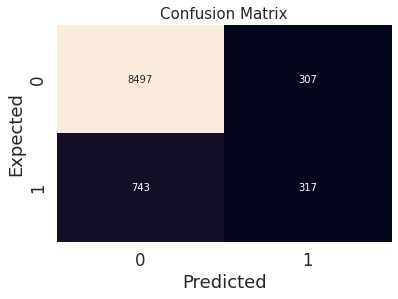

Recall:
0.2990566037735849
Specificity:
0.9651294865970014
Precision:
0.5080128205128205
Balanced Accuracy:
0.6320930451852931
F1 score:
0.37648456057007124


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)
accuracy_knn, recall_knn, Specificity_knn, Precision_knn, F1_score_knn, Balanced_Accuracy_knn = model_perf_v1(knn,X_train,X_test,y_train,y_test)
knn_perf = model_perf_to_lst(knn, X_test, y_test)

# **Naïve Bayes**

In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 7)

In [ ]:
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [ ]:
Y_pred = clf.predict(X_test)

Accuracy Score

In [ ]:
NB=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

Accuracy_score: 1.0


Confusion Matrix

In [ ]:
print('Confusion_matrix of NB:')
print(metrics.confusion_matrix(Y_test,Y_pred))

Confusion_matrix of NB:
[[8718    0]
 [   0 1167]]


Precision and Recall

In [ ]:
print('Precision: %.3f' % precision_score(Y_test, Y_pred))

Precision: 1.000


In [ ]:
print('Recall: %.3f' % recall_score(Y_test, Y_pred))

Recall: 1.000


# **Support Vector Machine**

In [ ]:
data=CD

In [ ]:
# split the datasets into training and test data
X = data.drop('y', axis=1)
y = data.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 555, test_size= 0.30)

In [ ]:
from sklearn import svm
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
svc = svm.SVC(kernel='rbf', C=70, gamma=0.001).fit(X_train,y_train)
predictionsvm = svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsvm))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8804
           1       0.61      0.37      0.46      1060

    accuracy                           0.91      9864
   macro avg       0.77      0.67      0.70      9864
weighted avg       0.89      0.91      0.90      9864



In [ ]:
predictionsvm = svc.predict(X_test)
percentage = svc.score(X_test,y_test)
percentage      

0.9066301703163017

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


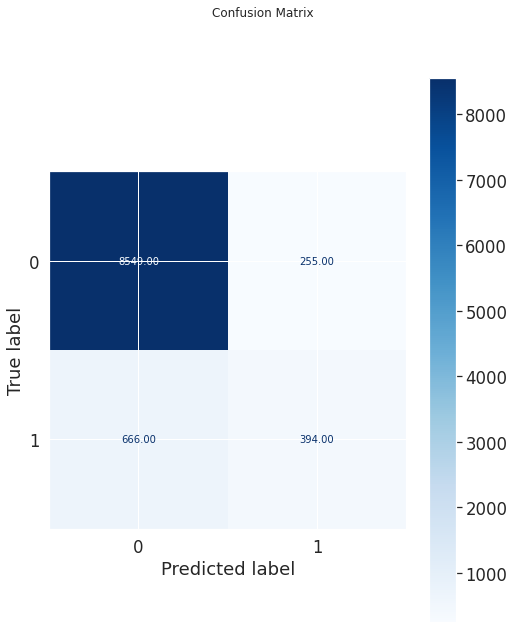

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(svc, X_test, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

# **Confusion Matrix Comparison**

  Confusion Matrix Comparison  Correct Positive Values  Type I Error  \
0         Logistic Regression                     8578           217   
1                         KNN                     8497           307   
2                 Naive Bayes                     8256           462   
3               Decision Tree                     8446           686   
4               Random Forest                     8446           307   
5                     Bagging                     8337           416   
6                    Boosting                     8290           463   
7                         SVM                     8540           255   

   Type II Error  Correct Negative Values  
0            680                      389  
1            743                      317  
2            846                      321  
3            651                      481  
4            717                      415  
5            664                      468  
6            701                      431  

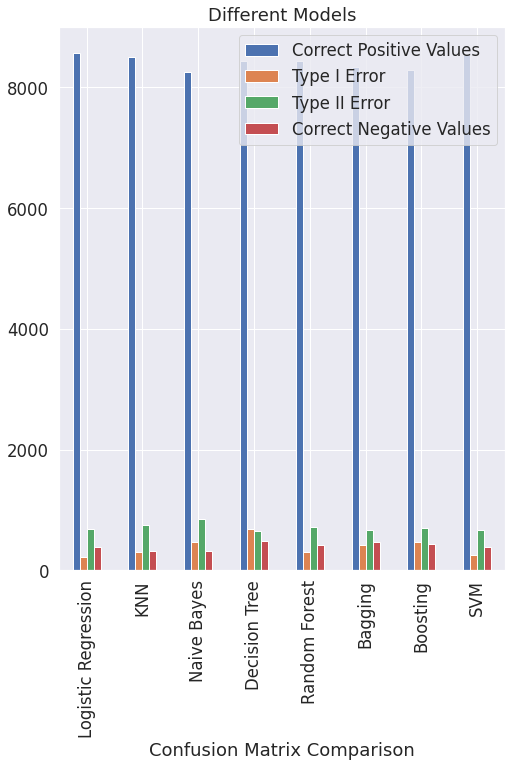

In [ ]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
df = pd.DataFrame([['Logistic Regression', 8578, 217, 680, 389], ['KNN', 8497, 307, 743, 317], ['Naive Bayes', 8256, 462, 846, 321],
                   ['Decision Tree', 8446, 686, 651, 481],['Random Forest', 8446, 307, 717, 415],['Bagging', 8337, 416, 664, 468],['Boosting', 8290, 463, 701, 431],['SVM', 8540, 255, 666, 394]],
                  columns=['Confusion Matrix Comparison', 'Correct Positive Values', 'Type I Error', 'Type II Error', 'Correct Negative Values'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Confusion Matrix Comparison',
        kind='bar',
        stacked=False,
        title='Different Models')